<a href="https://colab.research.google.com/github/rAvinashoy/Regression_Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**



# **Project Summary -**

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different model architectures and hyperparameter settings, ultimately selecting the model that performed the best on the test data.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**My goal is to develop a model that is highly accurate,high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

### Dataset Loading

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/DataScience/Capstone_Regression/SeoulBikeData.csv',encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'No of Rows = {df.shape[0]}')
print(f'No of Columns = {df.shape[1]}')

No of Rows = 8760
No of Columns = 14


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'Duplicate Value Count = {len(df[df.duplicated()])}')

Duplicate Value Count = 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(f'Missing Values/Null Values Count = {df.isna().sum().sum()}')

Missing Values/Null Values Count = 0


<Axes: >

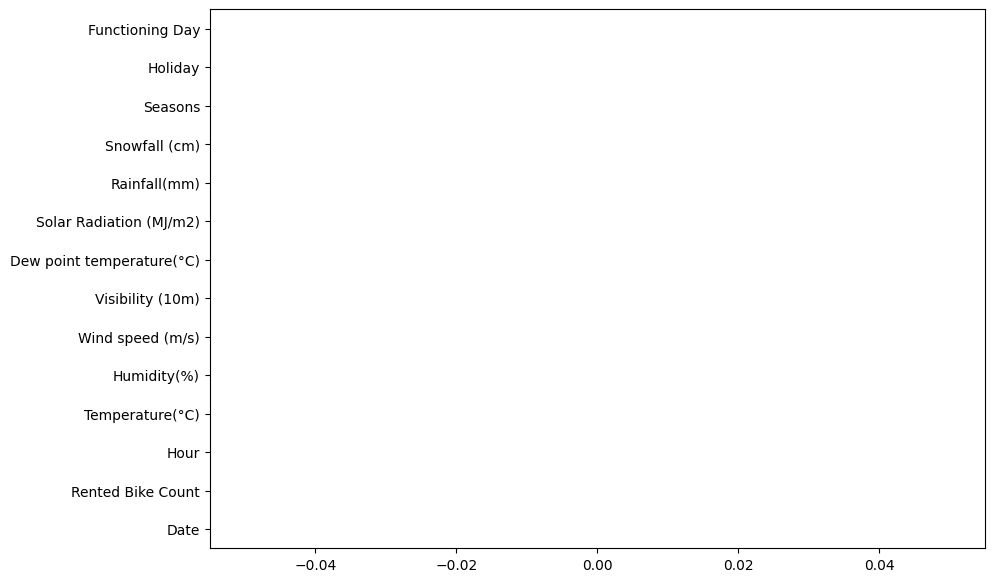

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,7))
df.isna().sum().plot(kind='barh')


### What did you know about your dataset?

- There are 8760 observation and 14 features.

- There are no Missing/Null values in the dataset also no Duplicate values.

- The dataset has object,float and int datatypes.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
#print(list(df[df.columns]))
for i in df.columns:
  print(i)

Date
Rented Bike Count
Hour
Temperature(°C)
Humidity(%)
Wind speed (m/s)
Visibility (10m)
Dew point temperature(°C)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
Seasons
Holiday
Functioning Day


In [12]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : obj*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : obj, there are only 4 season's in data*

**Holiday**: *If the day  is holiday period or not, type: obj further converted to int*

**Functioning Day**: *If the day is a Functioning Day or not, type : obj further converted to int*

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f"Unique Values in '{i}':")
  print(df[i].unique)
  print()

Unique Values in 'Date':
<bound method Series.unique of 0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object>

Unique Values in 'Rented Bike Count':
<bound method Series.unique of 0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64>

Unique Values in 'Hour':
<bound method Series.unique of 0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8760, dtype: int64>

Unique Values in 'Temperature(°C)':
<bound method Series.unique of 0      -5.2
1      -5.5
2      -6.0
3      -6.2
4      -6.0
       ... 
8755    4.2
8756    3.4
8757    2.6
8758    2.1
8759    1.9
Name: Temp

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
type(df['Date'][0])

str

In [15]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [17]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year  Month  
0             Yes  2017      1  
1             Yes  2017      1  
2             Yes  2017      1  
3             Yes  2017      1  
4             Yes  2017      1

### What all manipulations have you done and insights you found?

The Date column was in string datatype we have converted it to Timestamp.

Also new columns are added named Year,Month to the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Rented Bike Count in each Seasons

In [18]:
x = df['Seasons'].unique()
y = df.groupby('Seasons')['Rented Bike Count'].sum()

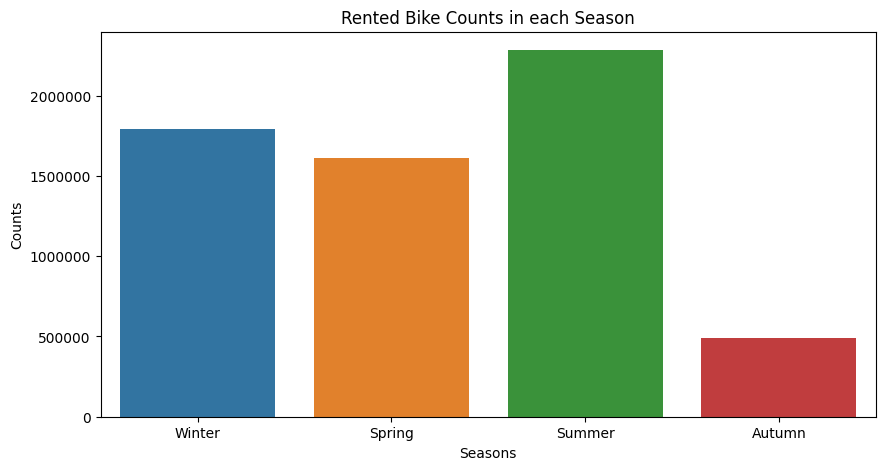

In [19]:
# # Chart - 1 visualization code
plt.figure(figsize =(10,5) )
sns.barplot(x=x,y=y)
plt.title('Rented Bike Counts in each Season')
plt.xlabel('Seasons')
plt.ylabel('Counts')
plt.ticklabel_format(style='plain',axis='y')


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.To show the counts of rented bikes according to seasons i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

It is observed among 4 distinct seasons most number of bikes are rented in Summer while the least number of bikes are rented in Autumn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates a positive impact as it suggests that there is a higher demand for bike rentals during summer season inspite of high temperatures, which can be beneficial for bike rental businesses. Higher demand often translates to increased revenue and profitability.

#### Chart - 2- Rented Bike Count in each Month

In [20]:
x = df['Month'].unique()
y = df.groupby('Month')['Rented Bike Count'].sum()

Text(0, 0.5, 'Counts')

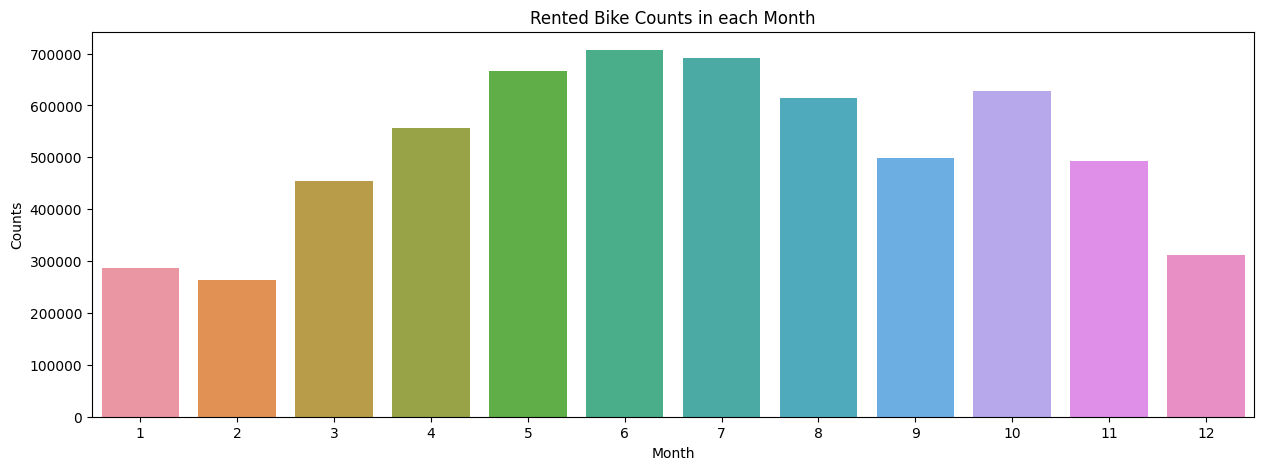

In [21]:
# Chart - 2 visualization code
plt.figure(figsize=(15,5))
sns.barplot(x=x,y=y)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts in each Month')
plt.xlabel('Month')
plt.ylabel('Counts')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.To show the counts of rented bikes according to months i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

It is observed that there is an increase in the rented bike counts from 3 rd to 6 th month.

Also 6 th month has the highest count for rented bikes whereas 2 nd month shows the least number of bike counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates positive impact of the increasing trend and the count.This indicates a growing demand for bike rentals over time.

#### Chart - 3- Rented Bike Count in Day Type(Holiday/No Holiday)

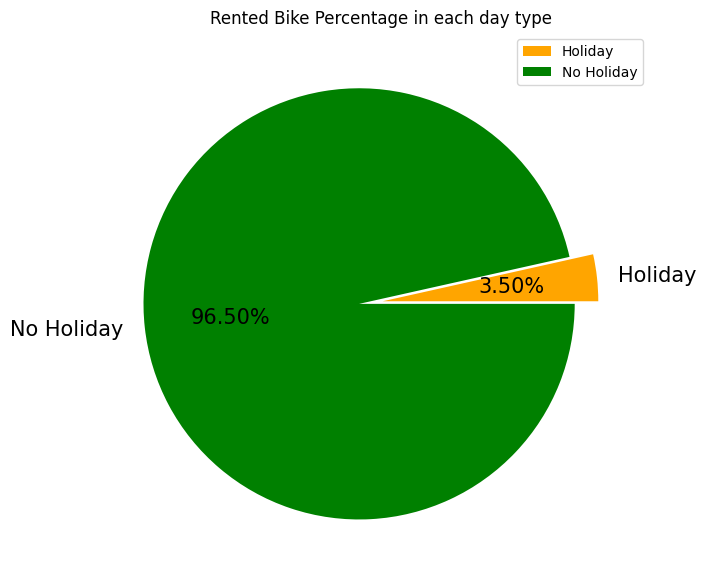

In [22]:
data = df.groupby('Holiday')['Rented Bike Count'].sum()
labels = ['Holiday', 'No Holiday']

plt.figure(figsize=(7,7))
colors = ["#FFA500","#008000"]
explode=(0.01,0.1)
plt.pie(data,labels=labels,colors=colors,autopct='%.2f%%',explode=explode,textprops={'fontsize':15})
plt.title('Rented Bike Percentage in each day type')
plt.legend()

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole.To check the rented bike percentages as per holidays i have used Pie chart.

##### 2. What is/are the insight(s) found from the chart?

It is oberved that around 96.5% bikes are rented on a No Holiday whereas remaining only 3.5% bikes are rented on a Holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates a positive impact as more number of bikes are rented on a No Holiday which depicts people may use these bikes for transport,work,etc thus increasing the business for bike market.

#### Chart - 4- Rented Bike Count in Functioning Day(Yes/No)

In [23]:
data = df.groupby('Functioning Day')['Rented Bike Count'].sum()
data

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

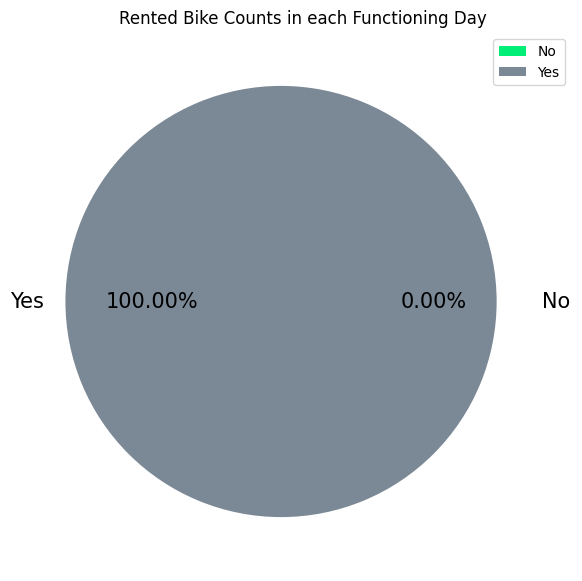

In [24]:
data = df.groupby('Functioning Day')['Rented Bike Count'].sum()
labels = ['No', 'Yes']

plt.figure(figsize=(7,7))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data,labels=labels,colors=colors,autopct='%.2f%%',explode=explode,textprops={'fontsize':15})
plt.title('Rented Bike Counts in each Functioning Day')
plt.legend()

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole.To check the rented bike percentages as per Functioning days i have used Pie chart.

##### 2. What is/are the insight(s) found from the chart?

It is observed that 100% bikes are rented on functioning days

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It signifies a positive impact,it suggests strong demand, potential for increased revenue, and an opportunity for businesses to align their offerings with customer preferences

#### Chart - 5- Rented Bike Count in Snowfall

In [25]:
x = df['Snowfall (cm)'].unique()
y = df.groupby('Snowfall (cm)')['Rented Bike Count'].sum()

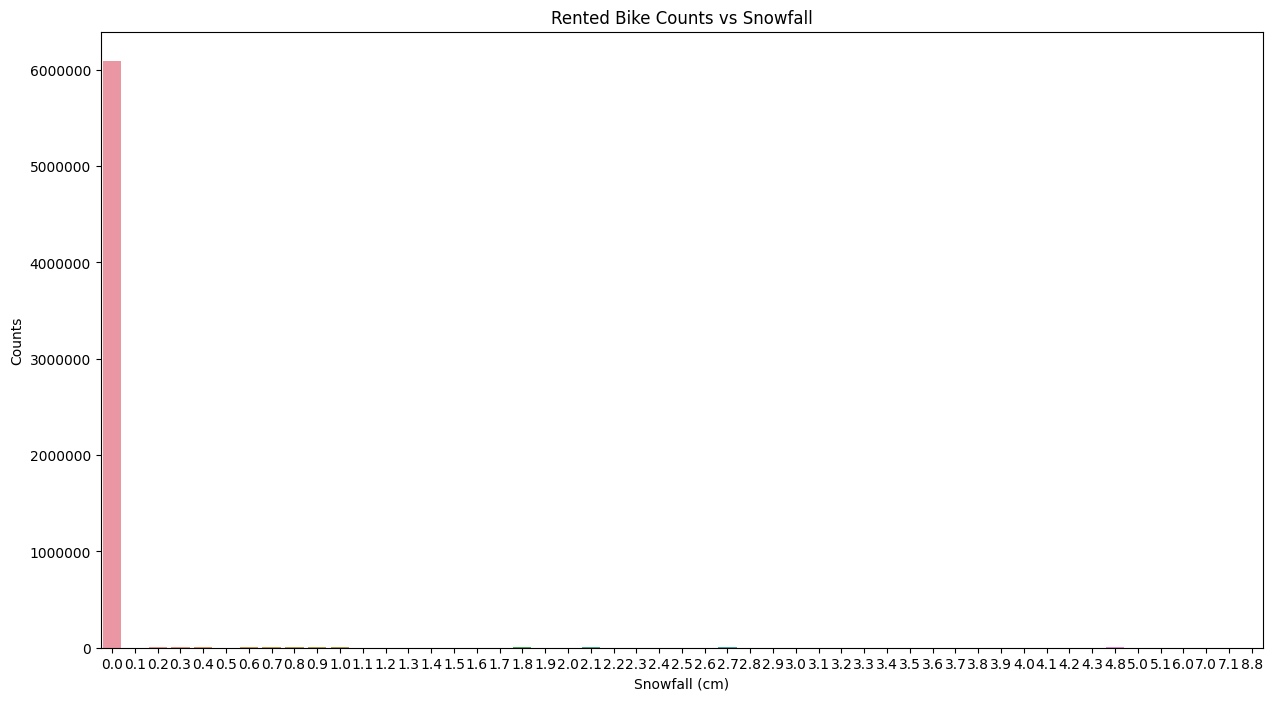

In [26]:
# Chart - 5 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x=x,y=y)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts vs Snowfall')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.To show the counts of rented bikes according to snowfall i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

It is observed that most bikes are rented when there is negligible snowfall or no snowfall.As the snowfall increases the counts of bikes decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates the potential negative impact during snowy periods. It indicates that bike rental businesses needs to thrive during regions with less snowfall, while they may experience lower demand and usage during snowy conditions.

#### Chart - 6- Rented Bike Count in Rainfall

In [27]:
x = df['Rainfall(mm)'].unique()
y = df.groupby('Rainfall(mm)')['Rented Bike Count'].sum()

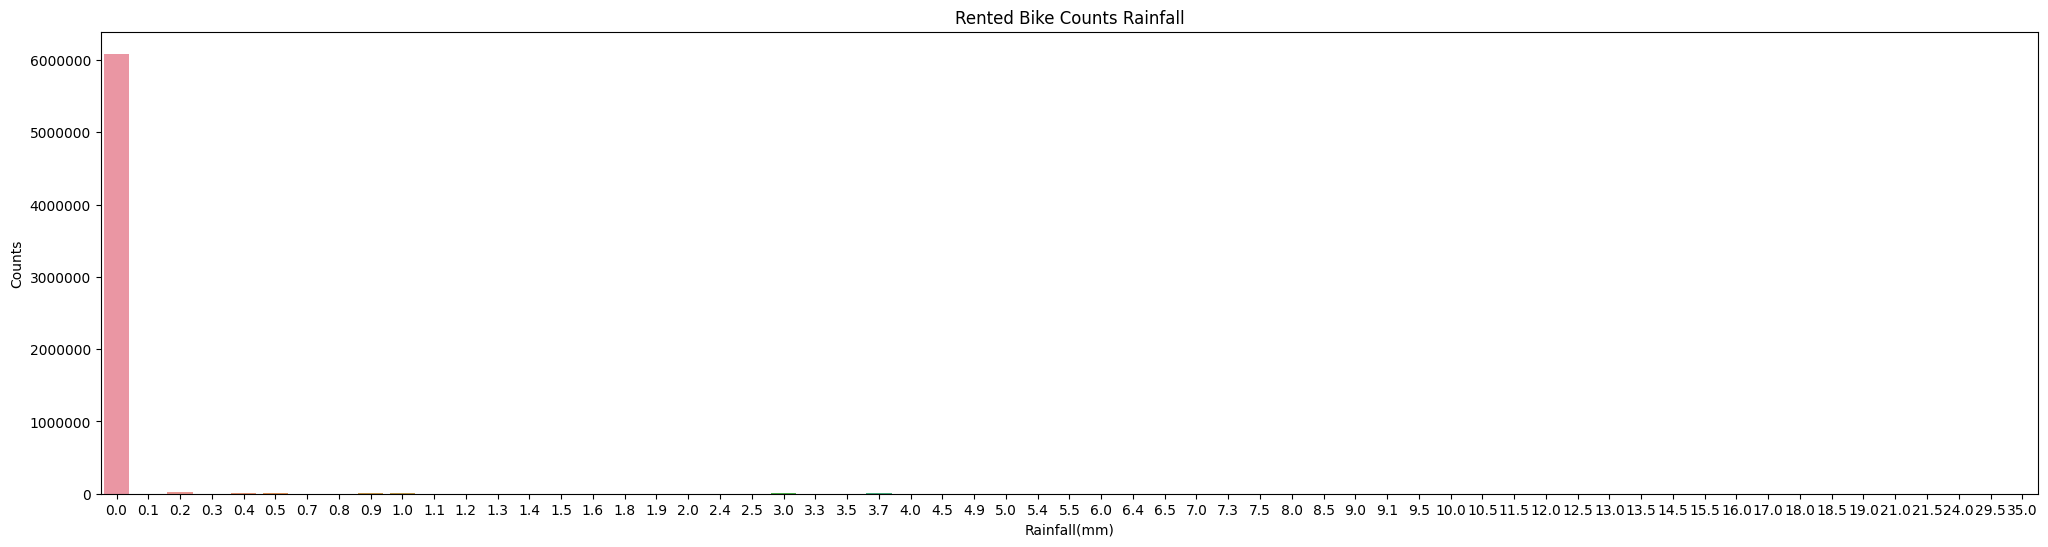

In [28]:
# Chart - 6 visualization code
plt.figure(figsize = (25,6))
sns.barplot(x=x,y=y)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts Rainfall')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.To show the counts of rented bikes according to rainfall i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

It is observed that most bikes are rented when there is negligible rainfall or no rainfall but also when the rainfall increases above 2mm there is still demand for bikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is positive impact as bike rental businesses can capitalize on the demand during dry weather and still cater to customers willing to ride in light to moderate rainfall.

#### Chart - 7- Rented Bike Count in Wind Speed

In [29]:
x = df['Wind speed (m/s)'].unique()
y = df.groupby('Wind speed (m/s)')['Rented Bike Count'].sum()

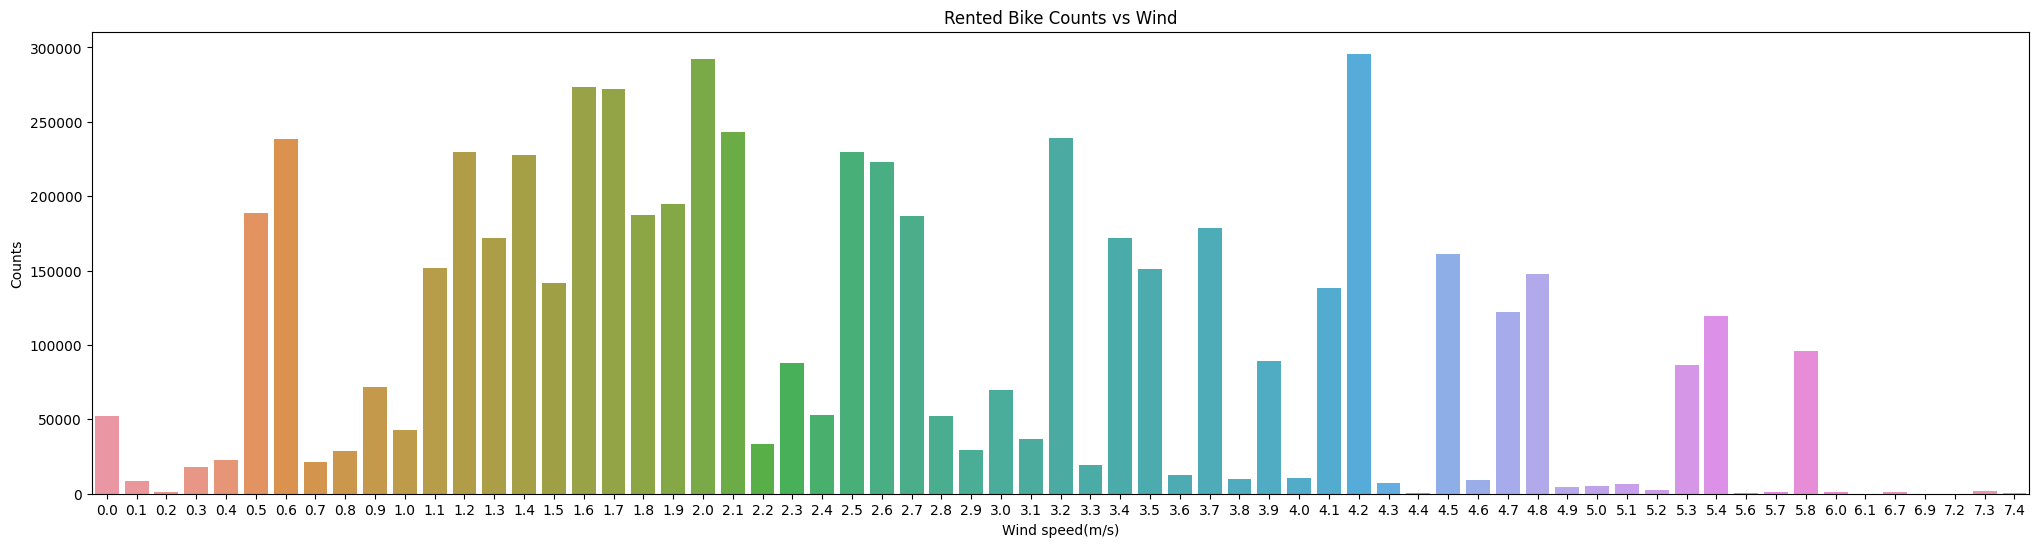

In [30]:
# Chart - 7 visualization code
plt.figure(figsize=(25,6))
sns.barplot(x=x,y=y)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts vs Wind')
plt.xlabel('Wind speed(m/s)')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.To show the counts of rented bikes according to windspeed i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above graph that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 4.2 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is considered to be positive impact as people's inclination to ride bikes in slightly windy conditions and the consistent demand across different wind speeds indicate that weather conditions, specifically wind, do not hinder bike rental popularity. Bike rental businesses can capitalize on this positive trend and provide services that cater to customers' preferences for riding in various wind conditions.

#### Chart - 8- Rented Bike Count in Humidity

In [31]:
x = df['Humidity(%)'].unique()
y = df.groupby('Humidity(%)')['Rented Bike Count'].sum()

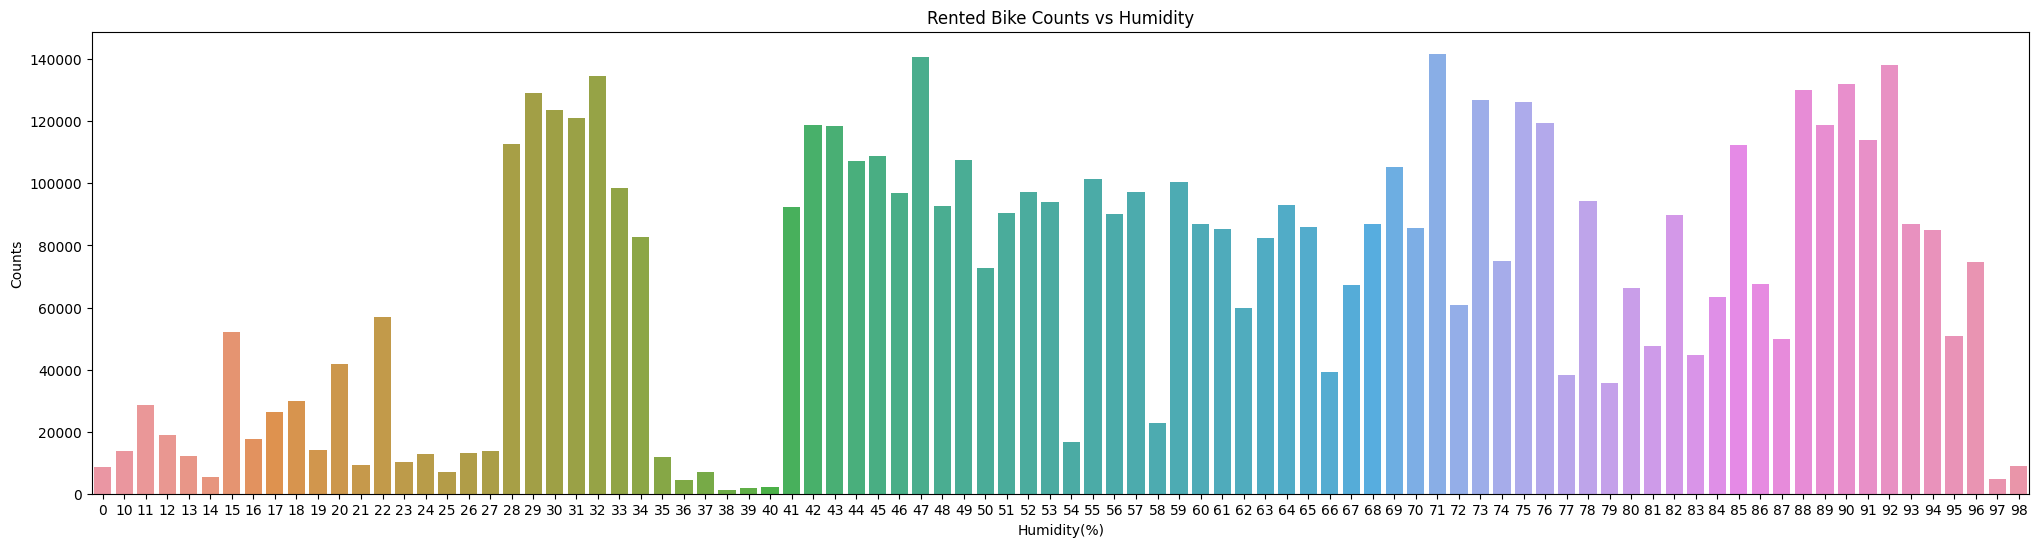

In [32]:
# Chart - 8 visualization code
plt.figure(figsize=(25,6))
sns.barplot(x=x,y=y)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts vs Humidity')
plt.xlabel('Humidity(%)')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.To show the counts of rented bikes according to Humidity i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

There is a significant increase in the counts of rented bikes even during the high percentages of humidity,which means people like riding bikes on humid days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is considered to be positive impact as people's inclination to ride bikes in humid conditions do not hinder bike rental popularity. Bike rental businesses can capitalize on this positive trend and provide services that cater to customers' preferences for riding in various wind conditions.

#### Chart - 9- Rented Bike Count in Hour of the day

In [33]:
x = df['Hour'].unique()
y = df.groupby('Hour')['Rented Bike Count'].sum()

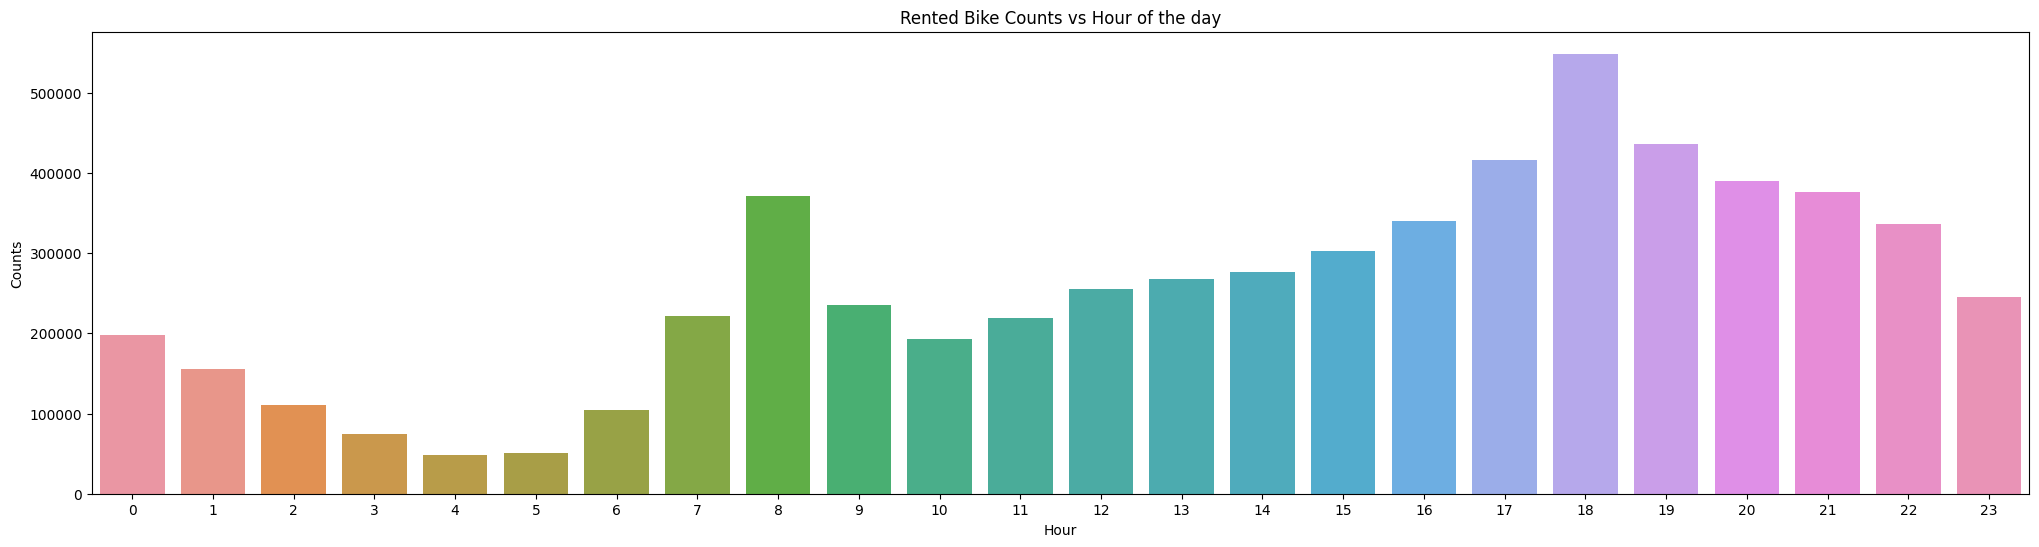

In [34]:
# Chart - 9 visualization code
plt.figure(figsize=(25,6))
sns.barplot(x=x,y=y)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts vs Hour of the day')
plt.xlabel('Hour')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.To show the counts of rented bikes according to Hours in a day i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

It is visible from the graph that demand for bikes increases from 6 am to 8 am and is highest at 6pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be considered as positive impact hours of days doesn't really much affects the counts of the bikes.

#### Chart - 10- Rented Bike Count in Temperature

In [35]:
data=df.groupby('Temperature(°C)')['Rented Bike Count'].sum()

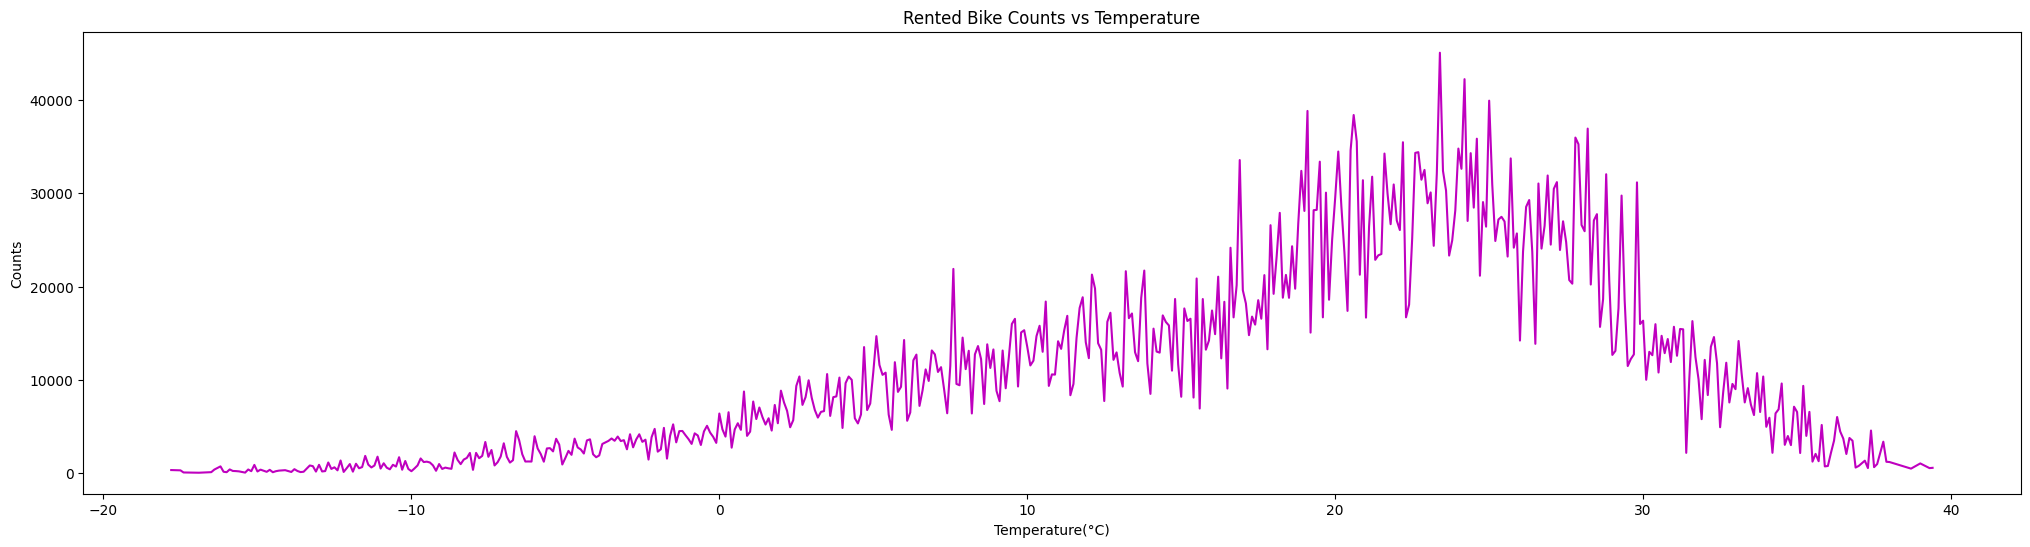

In [36]:
# Chart - 10 visualization code
data.plot(kind = 'line',figsize = (25,6),color='m')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts vs Temperature')
plt.xlabel('Temperature(°C)')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Line plots  are used to represent the relationship or trends between two continuous variables over a continuous or sequential range.To show the relationship between Temperature and rented bike counts i have used line plot.

##### 2. What is/are the insight(s) found from the chart?

It is observed that over a moderate range of temperatures the demands for bikes has increased.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates a positive impact as there is a favorable correlation between demand for bikes and temperatures falling within a specific range. Bike rental businesses can capitalize on this trend by promoting their services during moderate temperature periods and catering to the preferences of customers who prefer to ride bikes in comfortable weather conditions.

#### Chart - 11- Rented Bike Count in Visibility

In [37]:
data = df.groupby('Visibility (10m)')['Rented Bike Count'].sum()

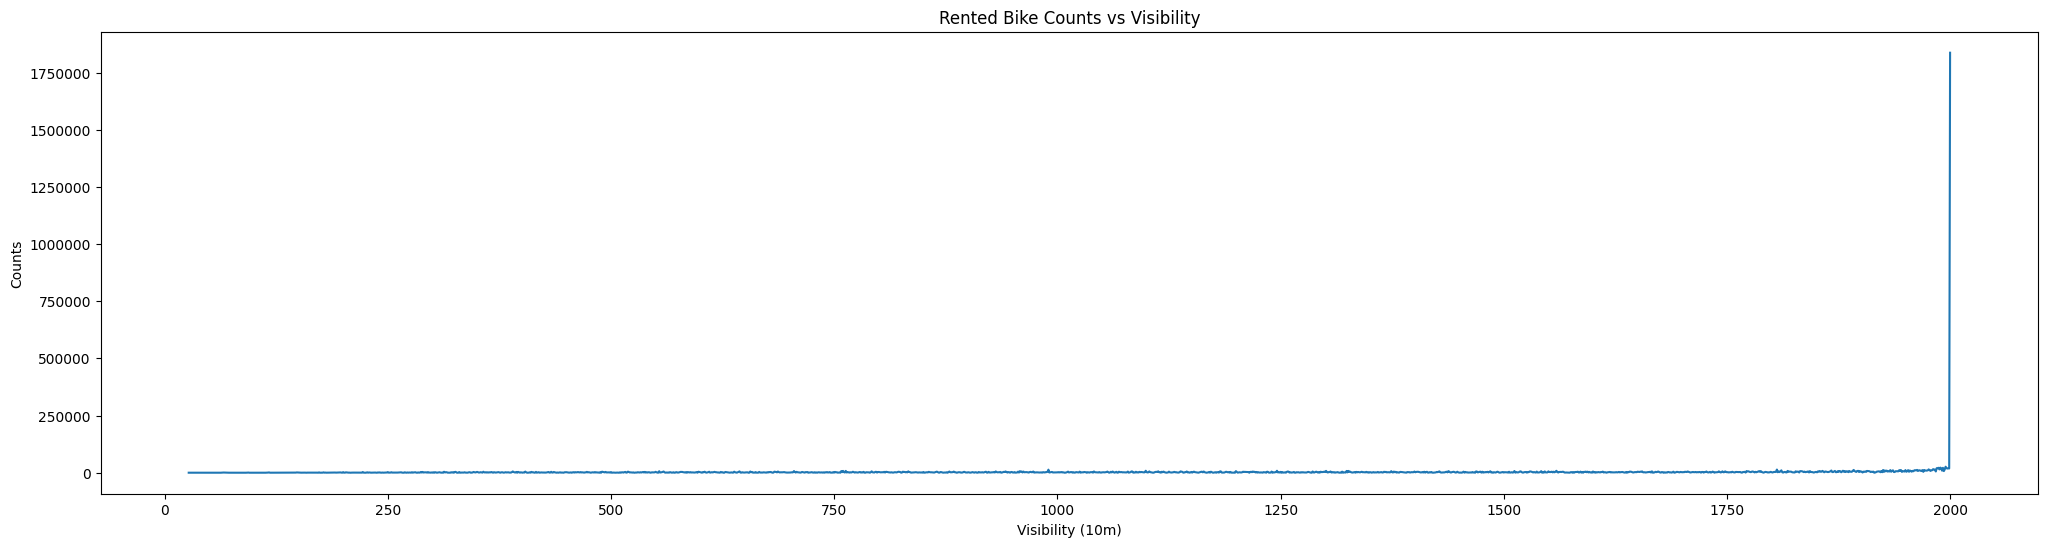

In [38]:
# Chart - 11 visualization code
data.plot(kind = 'line',figsize = (25,6))
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts vs Visibility')
plt.xlabel('Visibility (10m)')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Line plots  are used to represent the relationship or trends between two continuous variables over a continuous or sequential range.To show the relationship between Visibility and rented bike counts i have used line plot.

##### 2. What is/are the insight(s) found from the chart?

It is observed the people do rent bikes when there is a good visibilty.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is considered to be a negative impact as without favourable visibility conditions bike businesses cannot grow.

#### Chart - 12- Rented Bike Count in Solar Radiation

In [39]:
data = df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].sum()

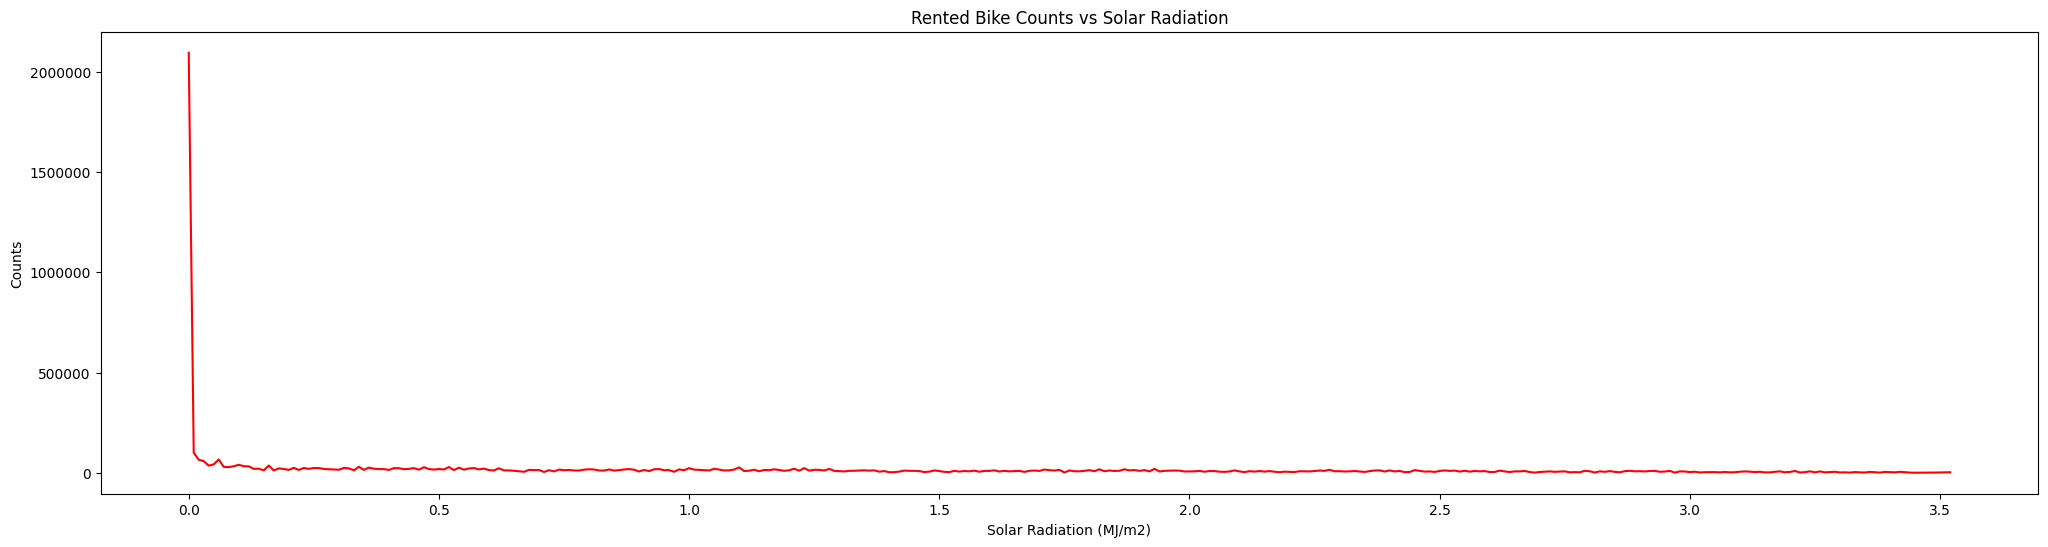

In [40]:
# Chart - 12 visualization code
data.plot(kind = 'line',figsize = (25,6),color='r')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts vs Solar Radiation')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are used to represent the relationship or trends between two continuous variables over a continuous or sequential range.To show the relationship between Solar Radiation and rented bike counts i have used line plot.

##### 2. What is/are the insight(s) found from the chart?

It is observed that people rent bikes when their is low solar raditations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is a negtive impact as solar raditation increases bike counts decreases.

#### Chart - 13- Rented Bike Count in Dew point temperature

In [41]:
data = df.groupby('Dew point temperature(°C)')['Rented Bike Count'].sum()

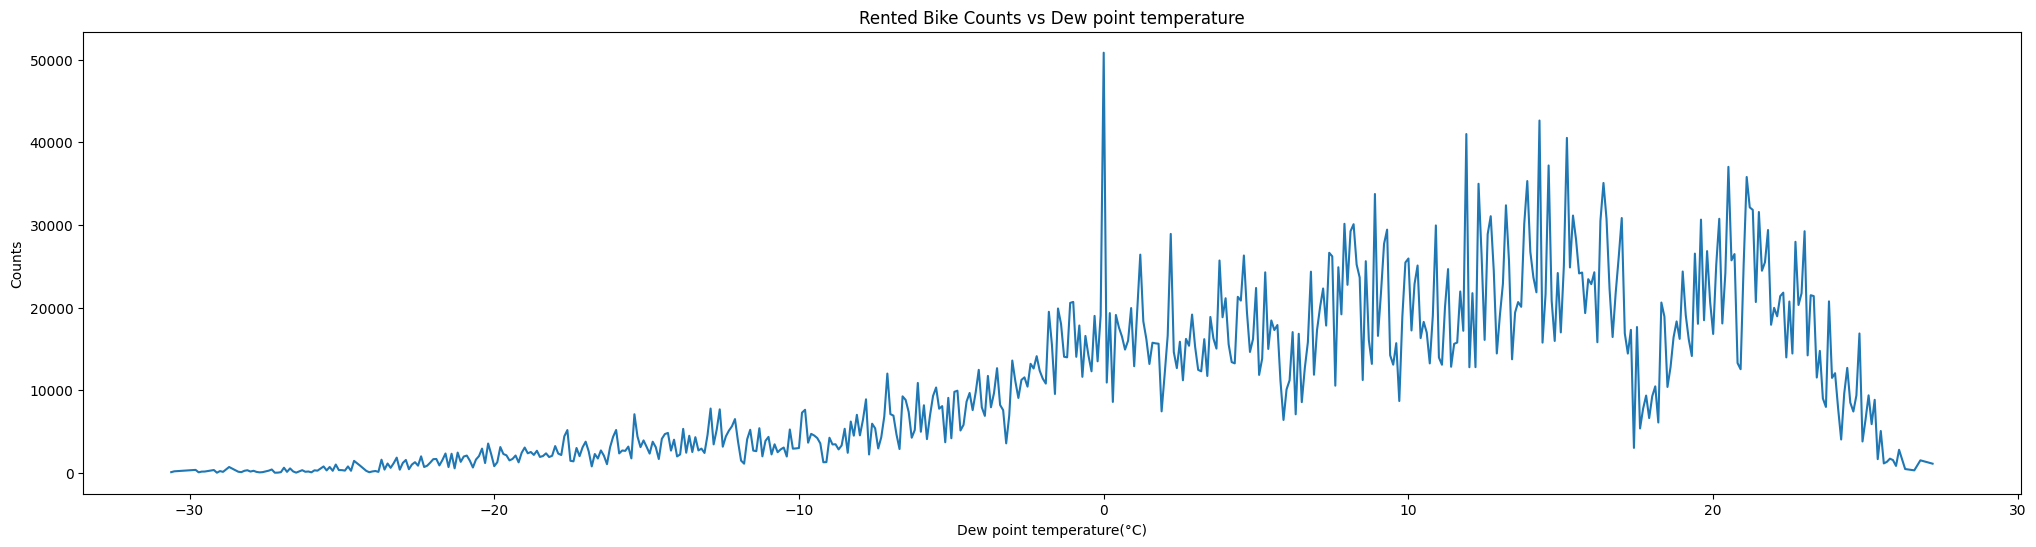

In [42]:
# Chart - 13 visualization code
data.plot(kind = 'line',figsize = (25,6))
plt.ticklabel_format(style='plain',axis='y')
plt.title('Rented Bike Counts vs Dew point temperature')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are used to represent the relationship or trends between two continuous variables over a continuous or sequential range.To show the relationship between Dew point temperature and rented bike counts i have used line plot.

##### 2. What is/are the insight(s) found from the chart?

It is observed that over a moderate range of dew pointtemperatures the demands for bikes has increased.
This plot's observation is very much similat to Temperature Vs rented count bikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates a positive impact as there is a favorable correlation between demand for bikes and dew point temperatures falling within a specific range. Bike rental businesses can capitalize on this trend by promoting their services during moderate dew point temperature periods and catering to the preferences of customers who prefer to ride bikes in comfortable weather conditions.

#### Chart - 14 - Correlation Heatmap

<Axes: >

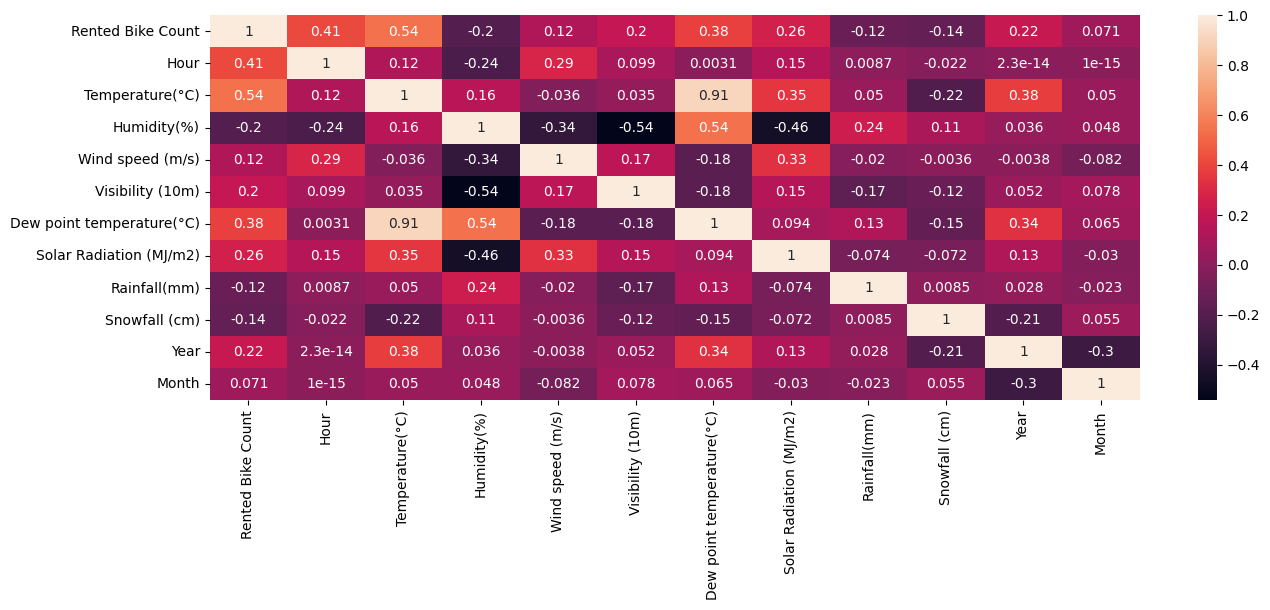

In [43]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

##### 1. Why did you pick the specific chart?

A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?

It is observed that most of the variables are positively correlated with target variable(Rented Bike Count) like Temperature,Dew point temperature.

Few are negatively correlated with target variable like humidity,rainfall.

We can also see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.

#### Chart - 15 - Pair Plot

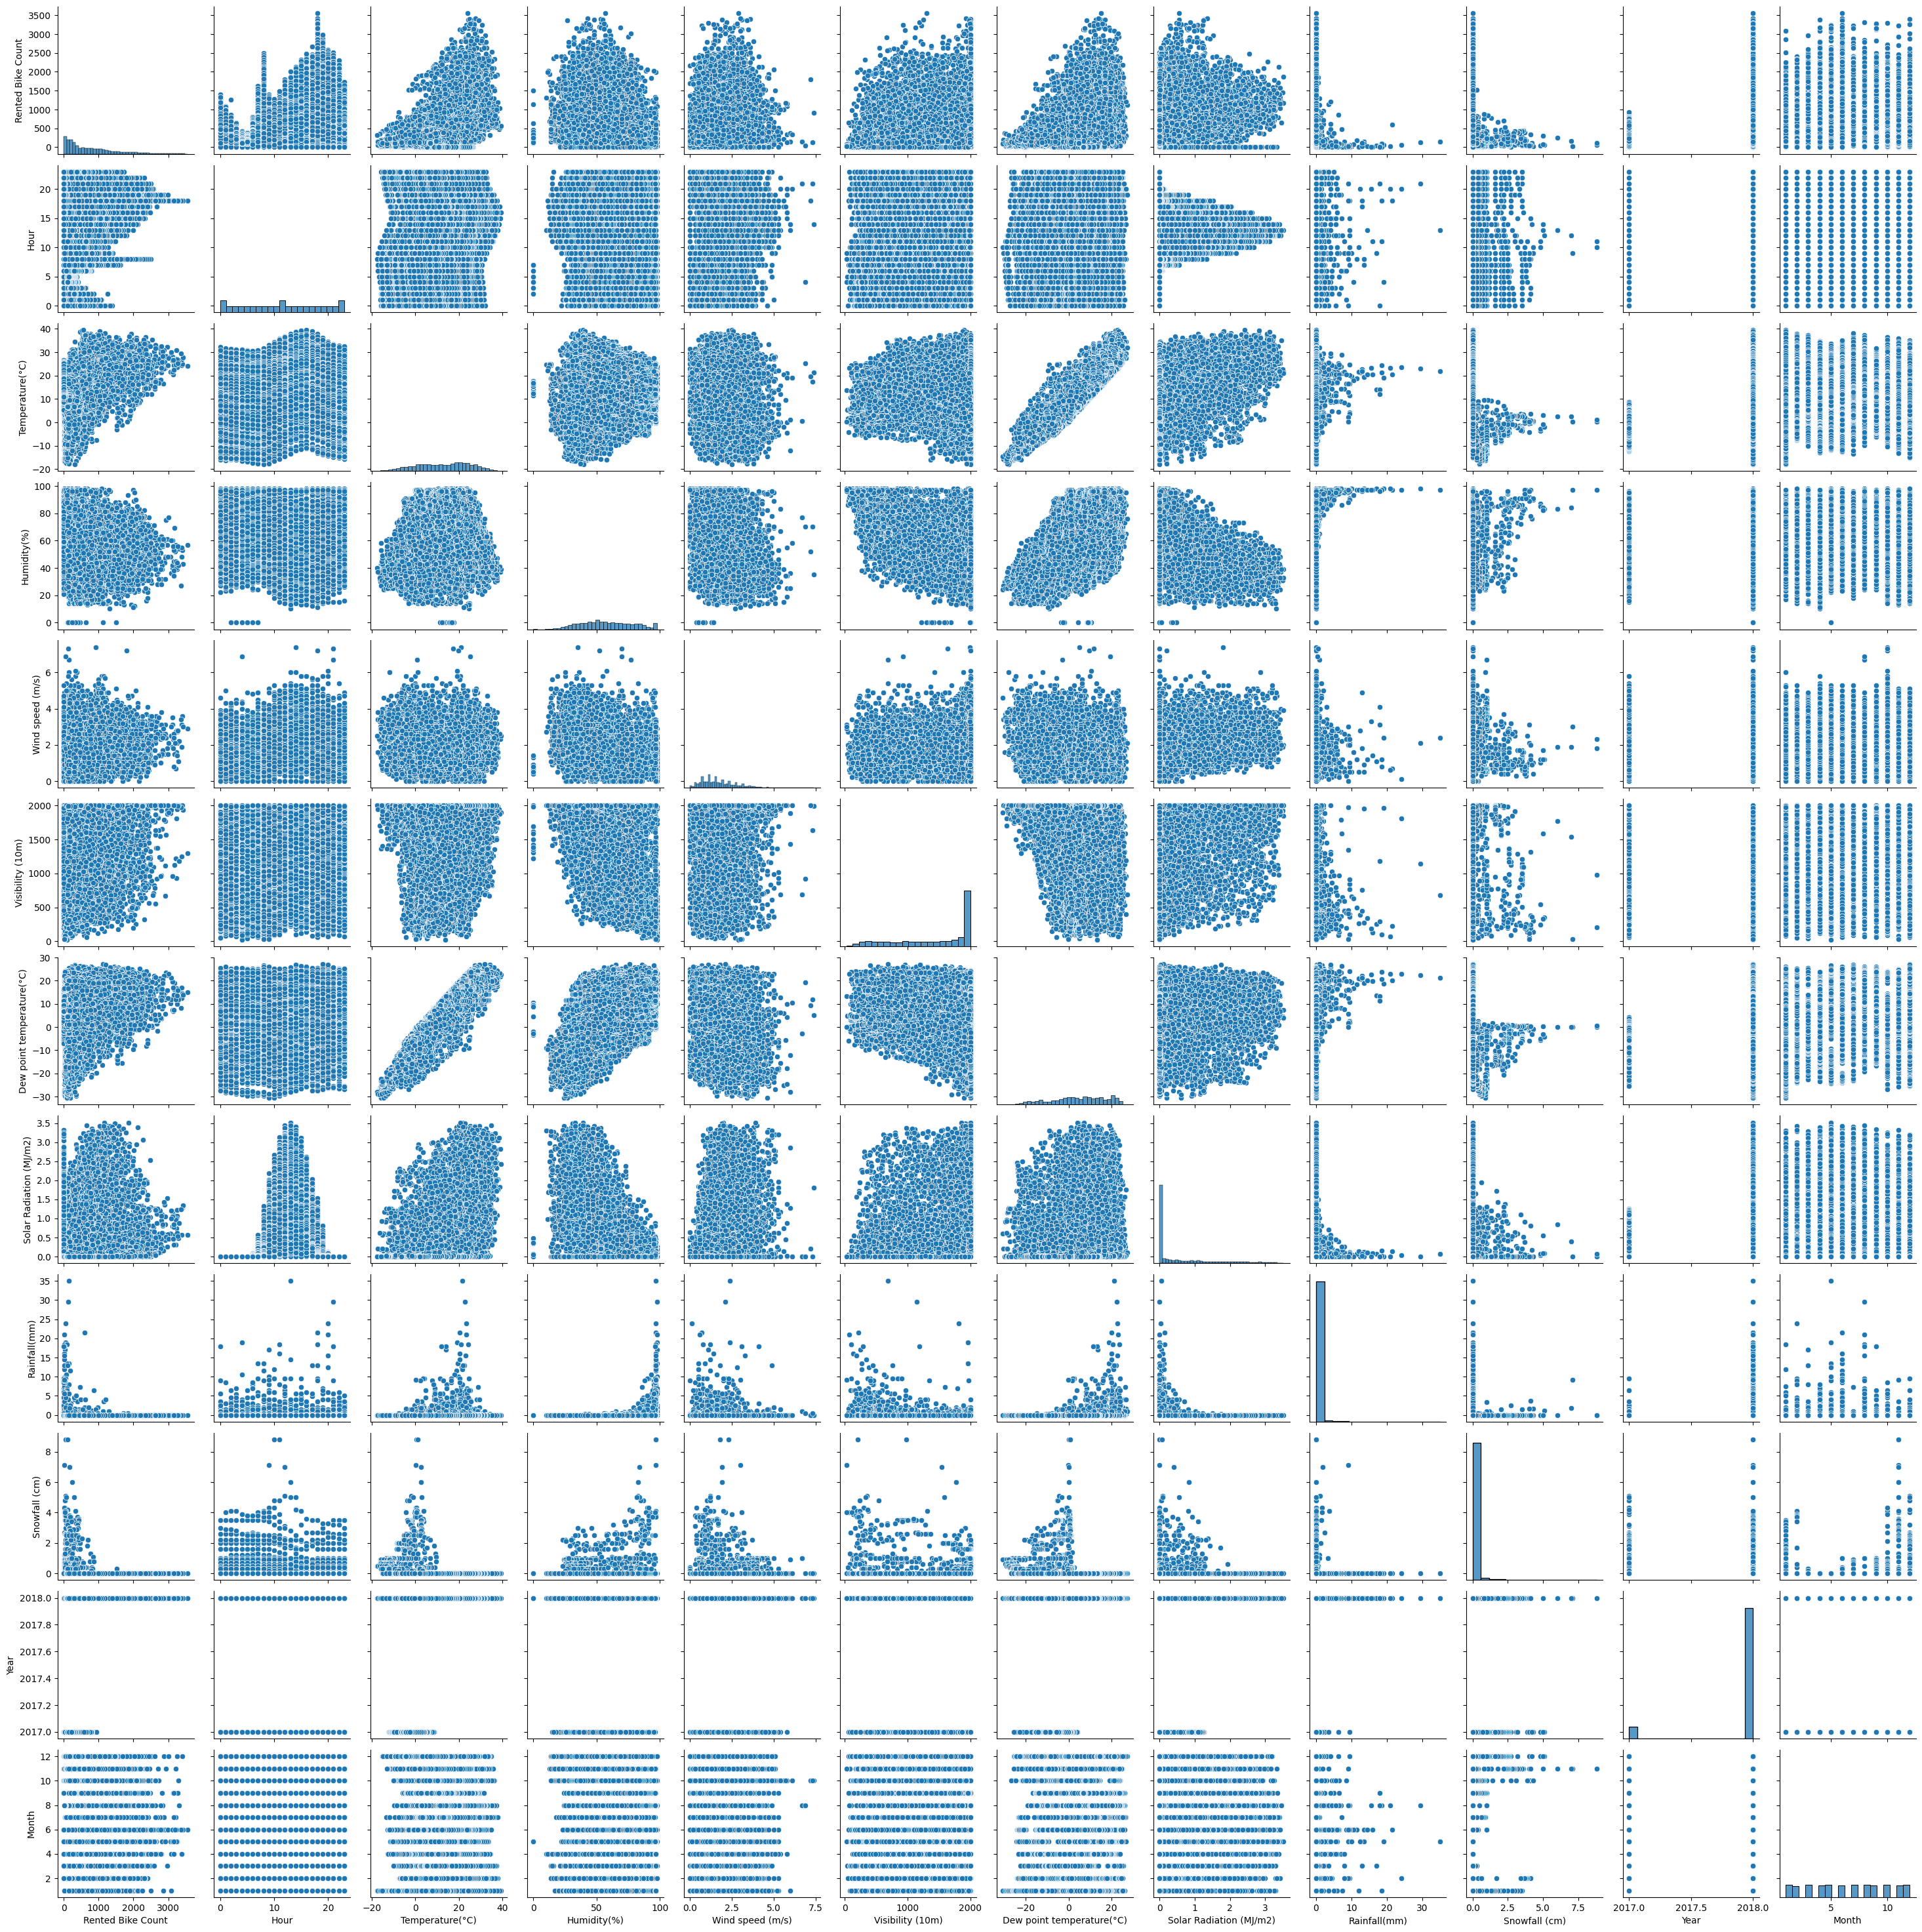

In [44]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pairplot is a type of scatter plot matrix that displays pairwise relationships between variables, allowing for a comprehensive analysis of data.

##### 2. What is/are the insight(s) found from the chart?

Very few columns have a correlation.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no Missing/Null Values present in the dataset.

### 2. Handling Outliers

In [46]:
df.drop('Date',axis=1,inplace=True) #Dropping the date column as it need not have to be in outliers treatment

In [47]:
#selecting only numerical features for outliers treatment
df_num= df.select_dtypes(include=['int64','float64'])
numerical_features = list(df_num.columns)

In [48]:
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Year',
 'Month']

In [49]:
numerical_features.remove("Rented Bike Count")
numerical_features.remove('Rainfall(mm)')
numerical_features.remove('Snowfall (cm)')
numerical_features.remove('Year')

In [50]:
numerical_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Month']

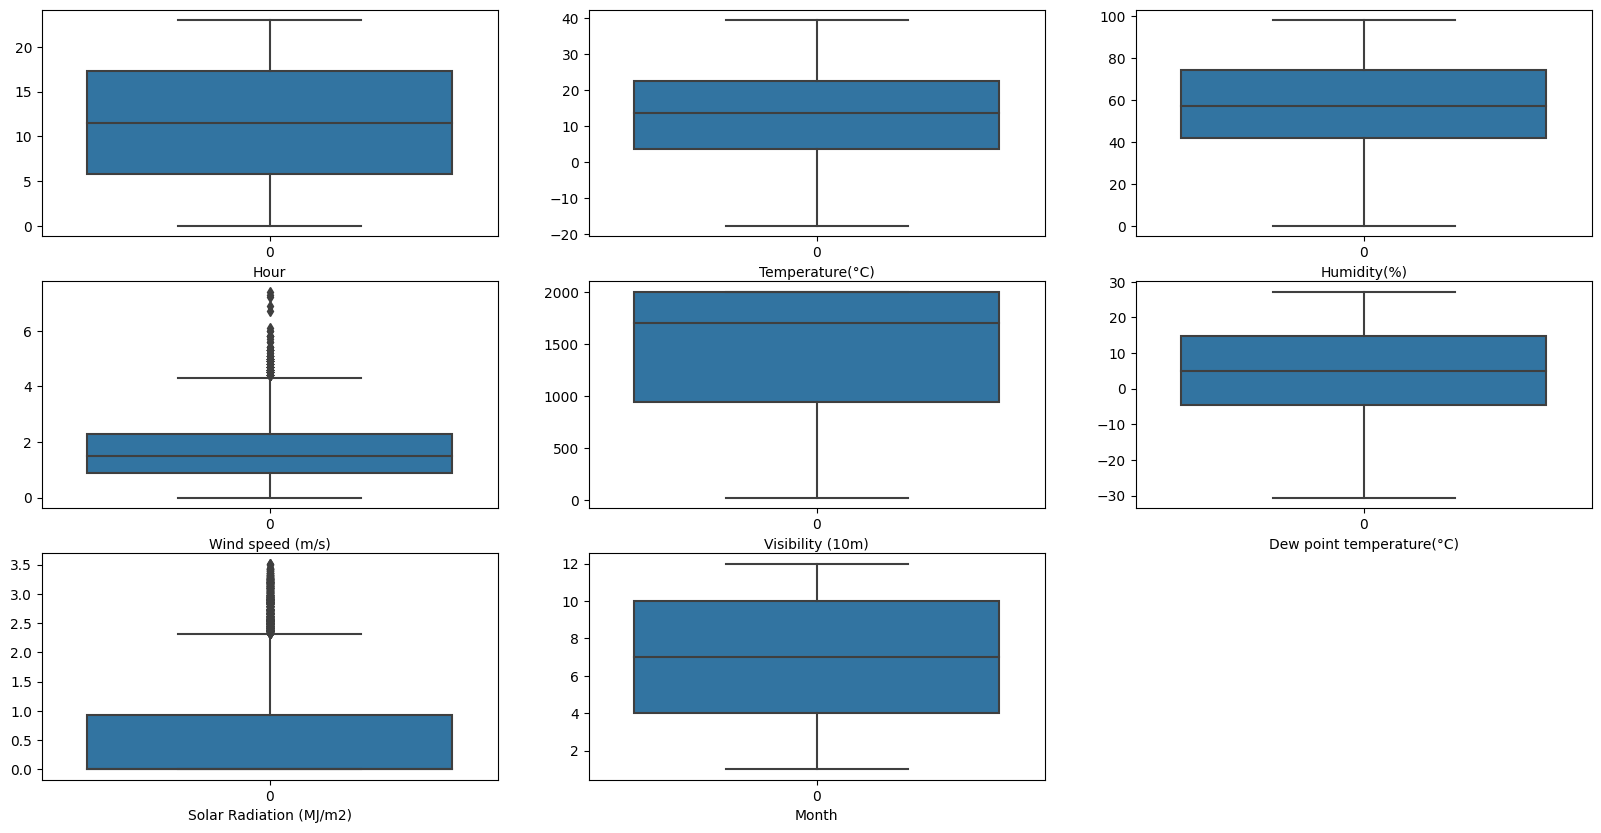

In [51]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(20,10))
plt.title('Outlier Analysis of Numerical Features')

for i,col in enumerate(numerical_features):
  plt.subplot(3, 3, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)

In [52]:
for col in df[numerical_features]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = df[col].clip(lower_bound, upper_bound)

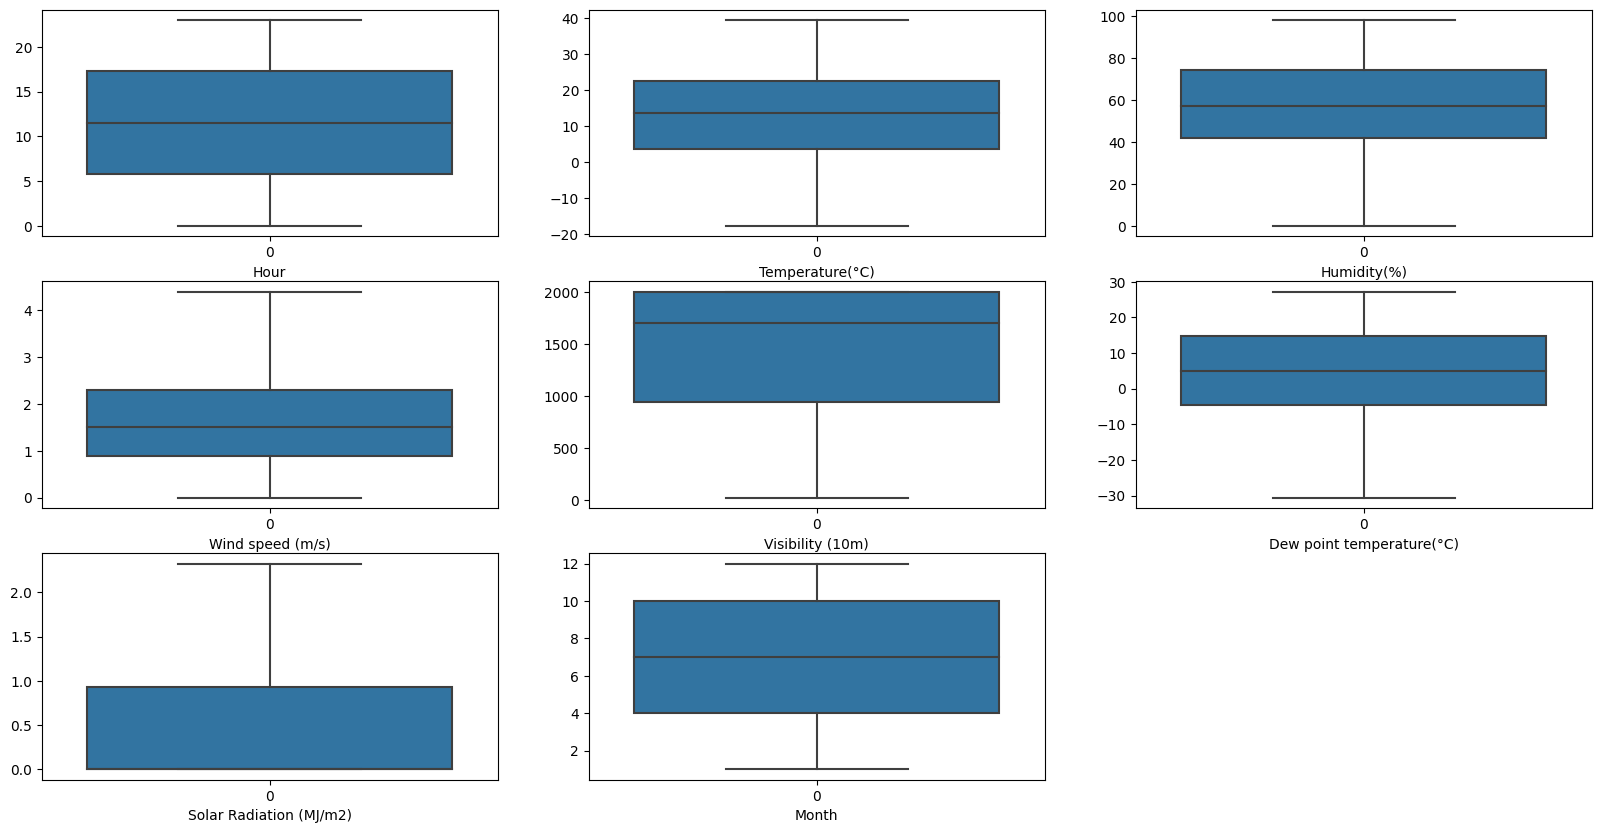

In [53]:
#Checking outliers after treatment
plt.figure(figsize=(20,10))
plt.title('Outlier Analysis of Numerical Features')

for i,col in enumerate(numerical_features):
  plt.subplot(3, 3, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We observed that there are outliers in Solar radiation & wind speed columns so we have removed them by using InterQuartile Range (IQR) Method.

## 3. Multicollinearity

VIF-Variance Inflation Factor( value greater than 10 is considered indicative of multicollinearity)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

In [55]:
calc_vif(df[[i for i in df.describe().columns]])

VIF Factor                   features
0     4.153651          Rented Bike Count
1     5.062376                       Hour
2   187.877603            Temperature(°C)
3   188.252346                Humidity(%)
4     5.053431           Wind speed (m/s)
5    10.484846           Visibility (10m)
6   126.244860  Dew point temperature(°C)
7     3.005951    Solar Radiation (MJ/m2)
8     1.123808               Rainfall(mm)
9     1.133352              Snowfall (cm)
10  401.206292                       Year
11    4.745413                      Month

It is observed that VIF factore is high for Temperature,Year,Humidity and Dew point temperaturewhich indicates multicollinearity.

In [56]:
df.drop(['Year','Dew point temperature(°C)'],axis=1,inplace=True)

In [57]:
calc_vif(df[[i for i in df.describe().columns]])

VIF Factor                 features
0    4.105548        Rented Bike Count
1    4.690550                     Hour
2    4.454751          Temperature(°C)
3    6.321554              Humidity(%)
4    4.825868         Wind speed (m/s)
5    5.444122         Visibility (10m)
6    2.352536  Solar Radiation (MJ/m2)
7    1.104312             Rainfall(mm)
8    1.124293            Snowfall (cm)
9    4.616495                    Month

By dropping the Year & Dew point temperature columns from the dataset the VIF factor for other variables has also improved.

## 4.Data Distribution

Numerical Features(Independent)

In [58]:
num_features = list((df.select_dtypes(include=['int64','float64'])).columns)
num_features.remove('Rented Bike Count')
num_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Month']

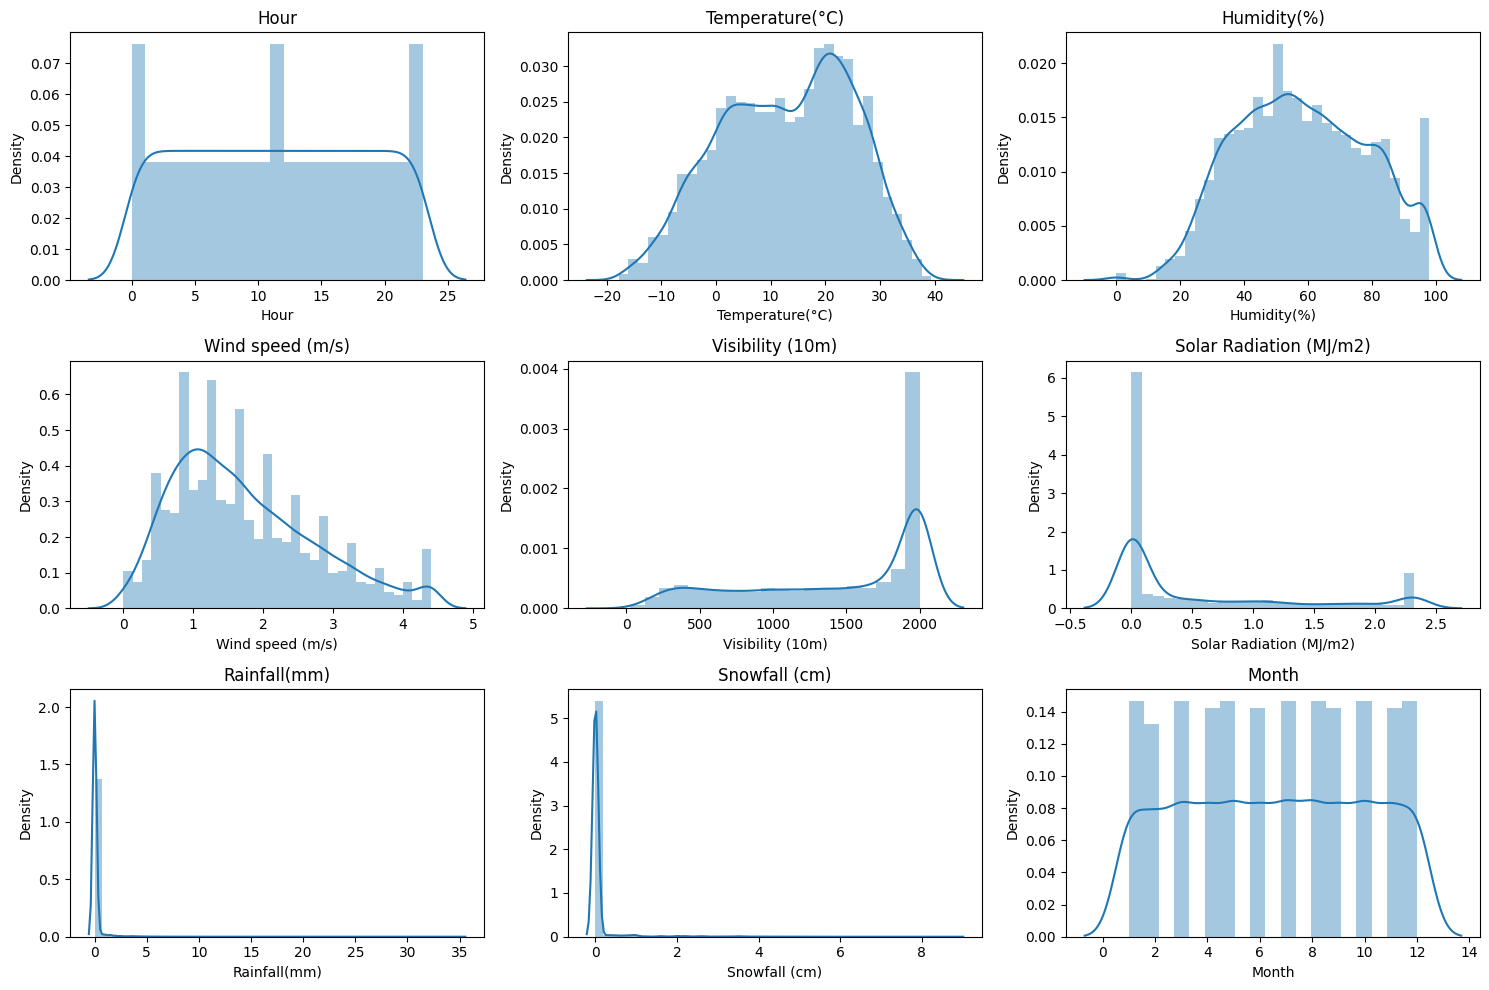

In [59]:
n=1
plt.figure(figsize=(15,10))
for i in num_features:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

Here we can see few features are skewed.

### 5. Categorical Encoding

In [60]:
# Encode your categorical columns
df['Winter'] = np.where(df['Seasons']=='Winter',1,0)
df['Spring'] = np.where(df['Seasons']=='Spring',1,0)
df['Summer'] = np.where(df['Seasons']=='Summer',1,0)
df['Autumn'] = np.where(df['Seasons']=='Autumn',1,0)

In [61]:
df['Holiday'] = np.where(df['Holiday']=='Holiday',0,1) # 0 represents the category 'Holiday' and 1 represents 'No Holiday'
df['Functioning Day'] = np.where(df['Functioning Day']=='Yes',1,0) #1 represents the category 'Yes' and 0 represents 'No'

In [62]:
df.drop('Seasons',axis=1,inplace = True)

In [63]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Month  Winter  Spring  Summer  Autumn  
0        1                1      1       1       0       0       0  
1        1                1      1       1       0       0       0  
2        1                1      1       1       0       0       0  
3        1                1      1       1       0       0       0  
4        1                1      1       1       0       0       0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Binary encoding is used for the 'Seasons','Holiday','Functioning day' features it is used so to converts categorical information into a binary representation that can be easily understood and processed by machine learning algorithms.

### 6. Normalization of Target Variable

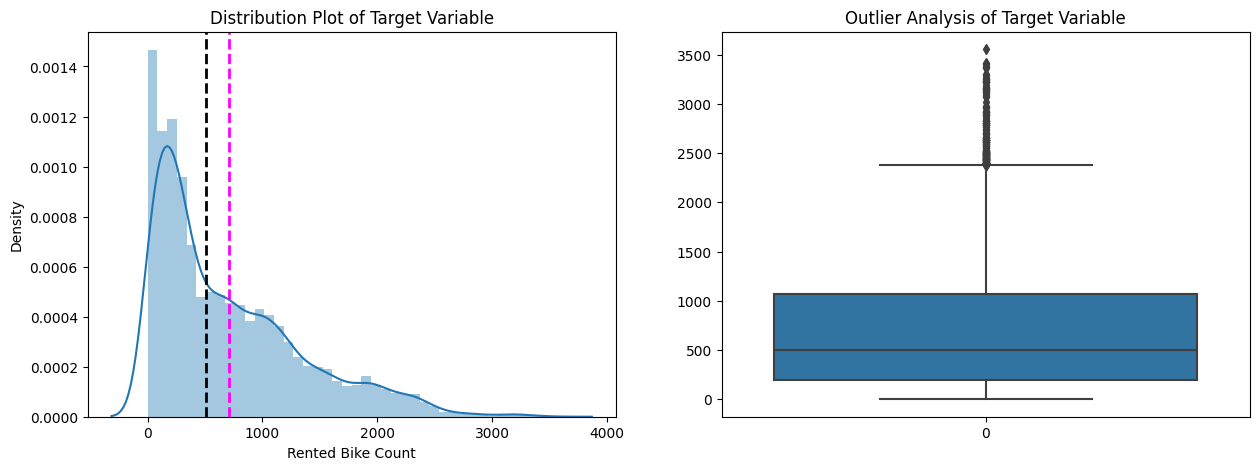

In [64]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(df['Rented Bike Count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line
dist.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(df['Rented Bike Count'], ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

* The graph above indicates that the Rented Bike Count has a moderate right skewness. Linear regression assumes that the dependent variable has a normal distribution, therefore, to meet this assumption, we need to take some measures to normalize the distribution.
* The boxplot above indicates that there are outliers in the rented bike count column.

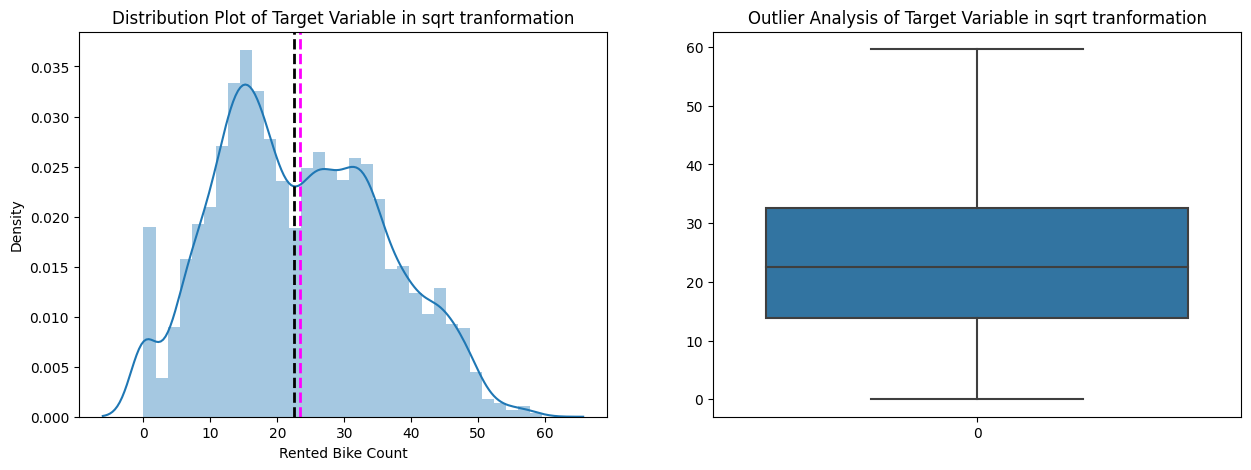

In [65]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(df['Rented Bike Count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# mean line
dist.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.sqrt(df['Rented Bike Count']), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

* By applying the square root transformation to the skewed Rented Bike Count, we were able to obtain an almost normal distribution, which is in line with the general rule that skewed variables should be normalized in linear regression.
* We find that there are no outliers in the Rented Bike Count column after applying square root transformation.

### 7. Data Splitting

In [66]:
X = df.drop('Rented Bike Count', axis=1)
y= np.sqrt(df[['Rented Bike Count']])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [68]:
print(X_train.shape)
print(X_test.shape)

(7008, 15)
(1752, 15)


##### What data splitting ratio have you used and why?

We have made the use of 80% and 20% Training and Testing data respectively.

## 8. Data Scaling

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


I have used Standard scaler for feature scaling

## ***6. ML Model Implementation***

### ML Model - 1 - **Linear Regression**

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable.

In [70]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [71]:
regressor.coef_

array([[ 3.39036923,  5.69682818, -3.17141972,  0.15016788,  0.14084153,
        -0.65886392, -1.70473053,  0.01338122,  0.61331707,  5.0121859 ,
         0.2634973 , -1.91617801,  0.25910999,  0.2274904 ,  1.41487135]])

In [72]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model used here is Linear Regression Model

In [73]:
# Train
MSE = mean_absolute_error(y_train,y_pred_train)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_train,y_pred_train)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  5.6213968389812505
RMSE:  2.370948510402799
R2:  0.651912160255312


Looks like our train set's R2 score value is 0.65  which is reasonably good & that means our model is able to capture most of the data variance.

In [74]:
# Test
MSE = mean_absolute_error(y_test,y_pred_test)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred_test)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  5.732592918597246
RMSE:  2.394283383101768
R2:  0.6516094592393504


The test set's R2 score is 0.65 which is as same as train set's R2.This means our linear model is performing well on the data.

Text(0, 0.5, 'Actual')

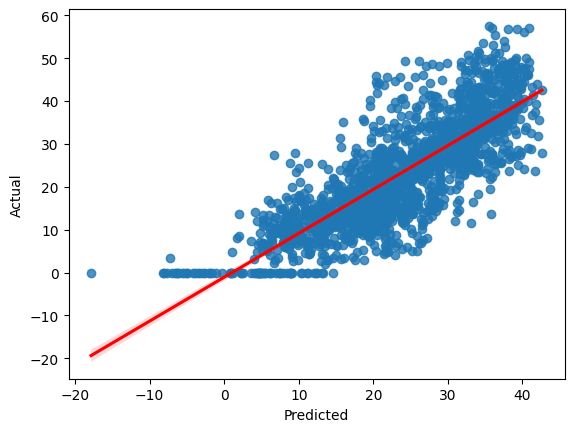

In [75]:
sns.regplot(x=y_pred_test, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

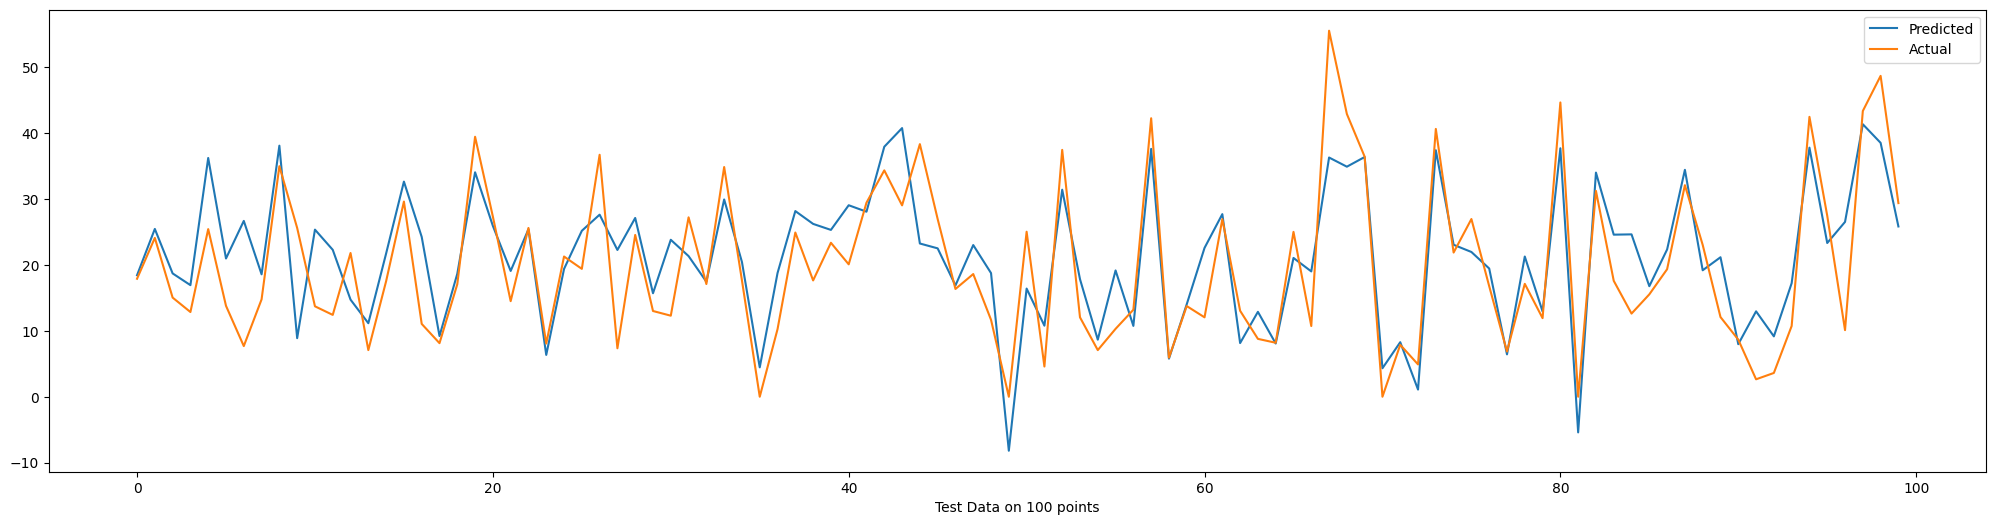

In [76]:
plt.figure(figsize=(25,6))
plt.plot(y_pred_test[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.xlabel('Test Data on 100 points')

plt.show()

### ML Model - 2-**Lasso Regression Model**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [77]:
lasso  = Lasso(alpha=1.0 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(max_iter=3000)

In [78]:
lasso.score(X_train, y_train)

0.6074462198082411

In [79]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used Lasso Regression Model

In [80]:
# Train
MSE = mean_absolute_error(y_train,y_pred_train)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_train,y_pred_train)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  6.046270120444046
RMSE:  2.458916452514002
R2:  0.6074462198082411


Looks like our train set's R2 score value is 0.60 which is reasonably good & that means our model is able to capture most of the data variance.

In [81]:
# Test
MSE = mean_absolute_error(y_test,y_pred_test)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred_test)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  6.246443624368235
RMSE:  2.4992886236623884
R2:  0.5971388600449312


The test set's R2 score is 0.59.This means our linear model is performing well on the data.

Text(0, 0.5, 'Actual')

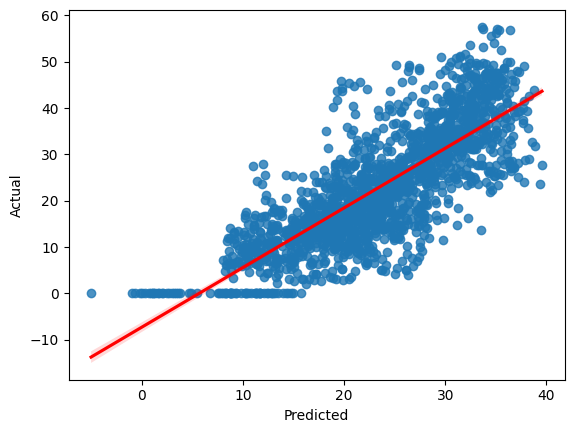

In [82]:
sns.regplot(x=y_pred_test, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

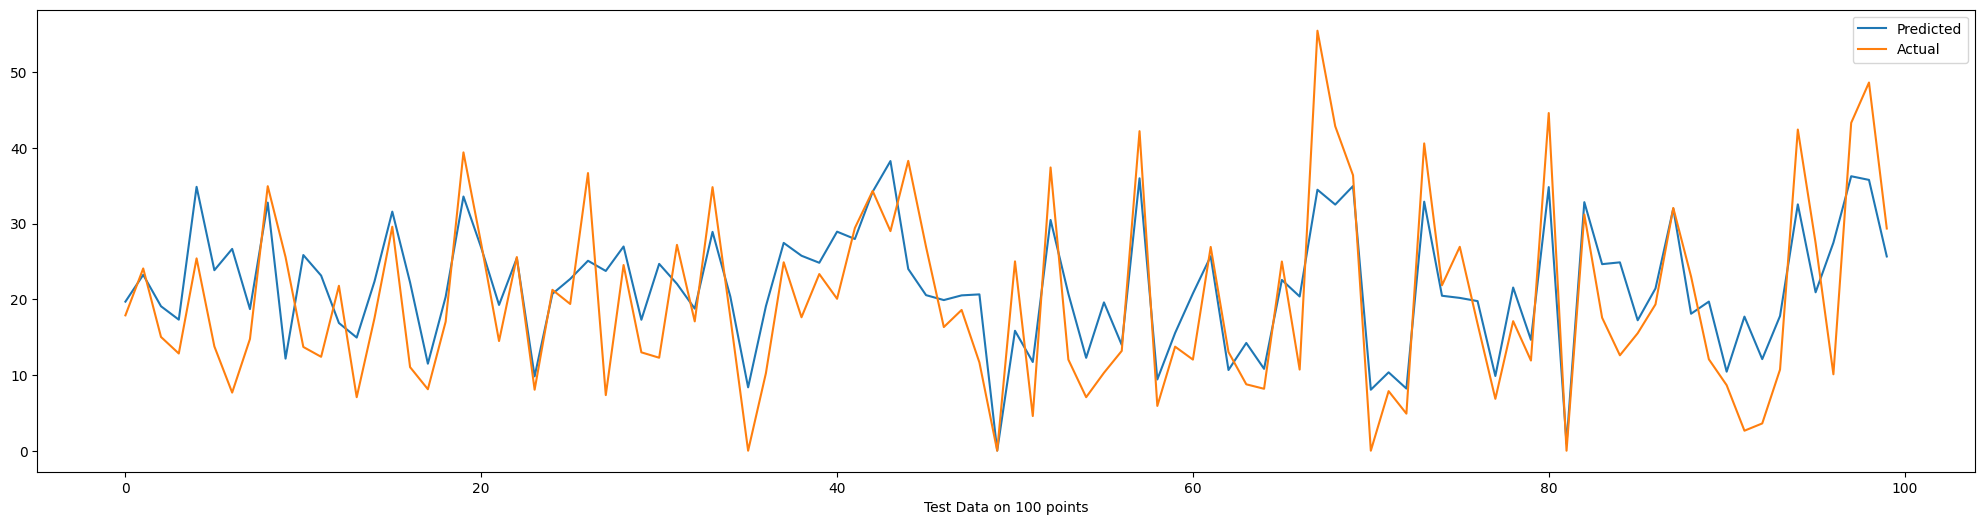

In [83]:
plt.figure(figsize=(25,6))
plt.plot(y_pred_test[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.xlabel('Test Data on 100 points')
plt.show()

####  Cross- Validation & Hyperparameter Tuning

In [84]:
# Hyperparameter Tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [85]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -53.959479562511724


In [86]:
y_pred_train = lasso_regressor.predict(X_train)
y_pred_test = lasso_regressor.predict(X_test)

In [87]:
# Train
MSE = mean_absolute_error(y_train,y_pred_train)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_train,y_pred_train)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  5.621954802796012
RMSE:  2.371066174276039
R2:  0.651898738620611


Looks like our train set's R2 score value is 0.65  which is reasonably good & that means our model is able to capture most of the data variance.

In [88]:
# Test
MSE = mean_absolute_error(y_test,y_pred_test)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred_test)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  5.735875979520939
RMSE:  2.3949688890507406
R2:  0.6514585514678741


The test set's R2 score is 0.65 which is as same as train set's R2.This means our linear model is performing well on the data.

Text(0, 0.5, 'Actual')

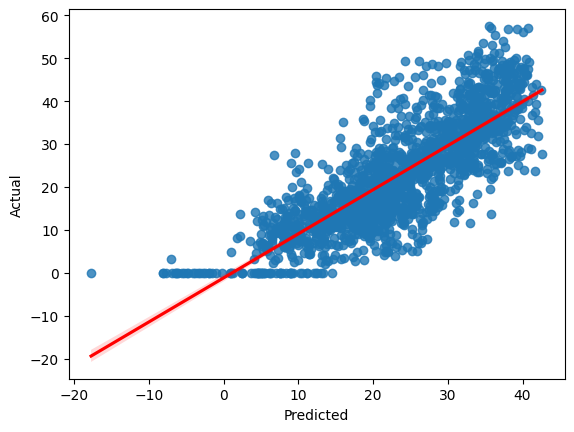

In [89]:
sns.regplot(x=y_pred_test, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

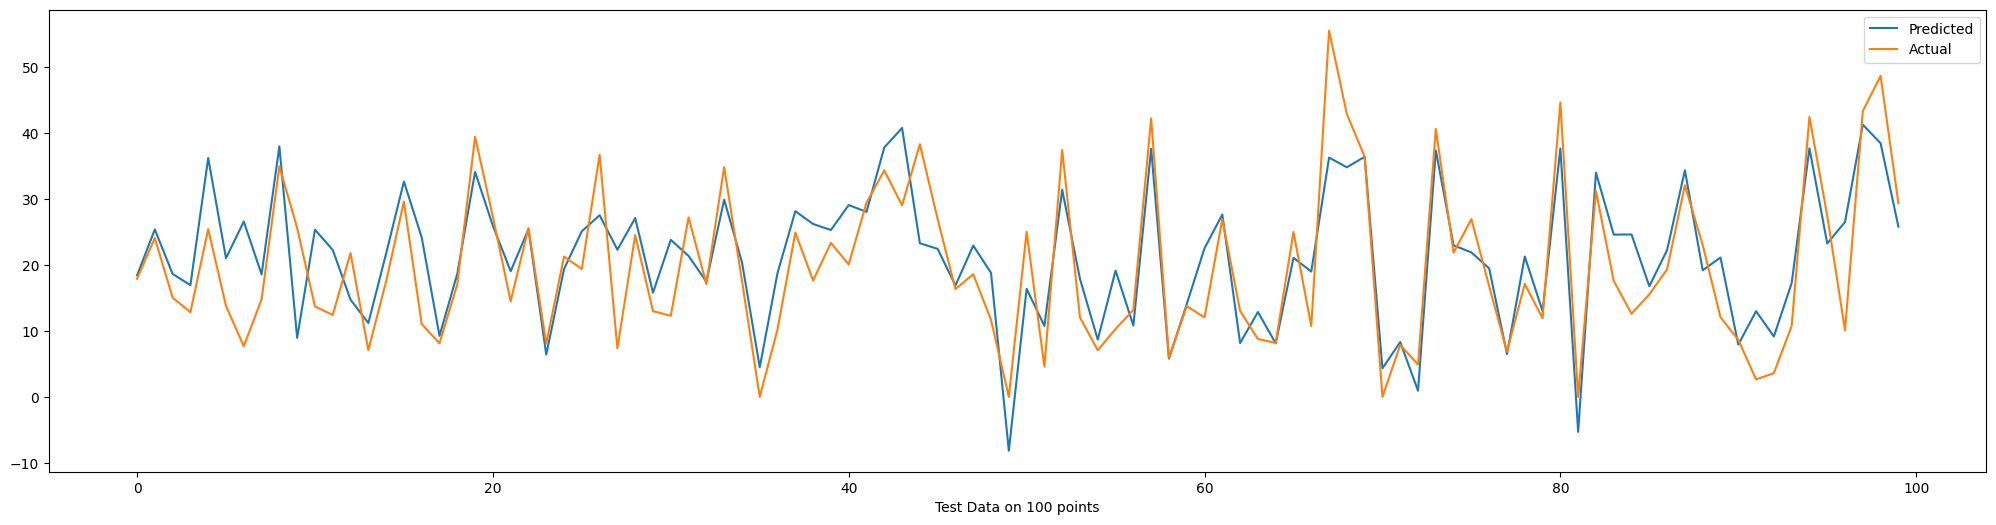

In [90]:
plt.figure(figsize=(25,6))
plt.plot(y_pred_test[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.xlabel('Test Data on 100 points')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter tuning because it helps in finding the optimal parameter values from a given set of parameters in a grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

R2 scores for Train & Test set :

Before Hyperparameter Tuning :

**Train set R2 score : 0.60**

**Test set R2 score : 0.65**

After Hyperparameter Tuning :

**Train set R2 score : 0.59**

**Test set R2 score : 0.65**

It is observed that R2 scores for Train set has been slightly reduced after hyperparameter tuning whereas Test set R2 scores are same.

Which indiacates there isn't much  difference in the results obtained from Linear Regression & Lasso Regression

### ML Model - 3- **Ridge Regression Model**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [91]:
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [92]:
ridge.score(X_train, y_train)

0.6519121599924853

In [93]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used Ridge Regression Model here.

In [94]:
# Train
MSE = mean_absolute_error(y_train,y_pred_train)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_train,y_pred_train)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  5.621401925383654
RMSE:  2.37094958305394
R2:  0.6519121599924853


Looks like our train set's R2 score value is 0.65  which is reasonably good & that means our model is able to capture most of the data variance.

In [95]:
# Test
MSE = mean_absolute_error(y_test,y_pred_test)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred_test)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  5.732605847077186
RMSE:  2.394286082964437
R2:  0.6516087158440178


The test set's R2 score is 0.65 which is as same as train set's R2.This means our linear model is performing well on the data.

Text(0, 0.5, 'Actual')

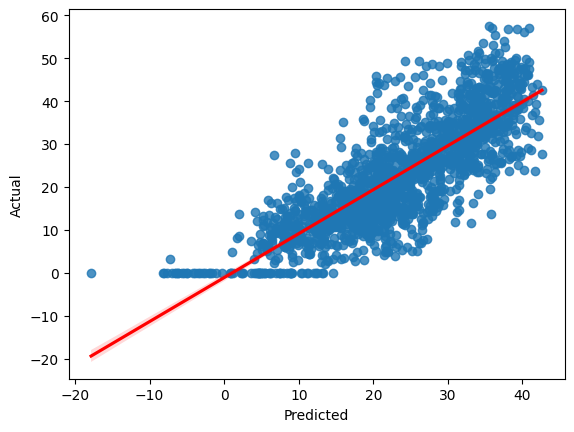

In [96]:
sns.regplot(x=y_pred_test, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

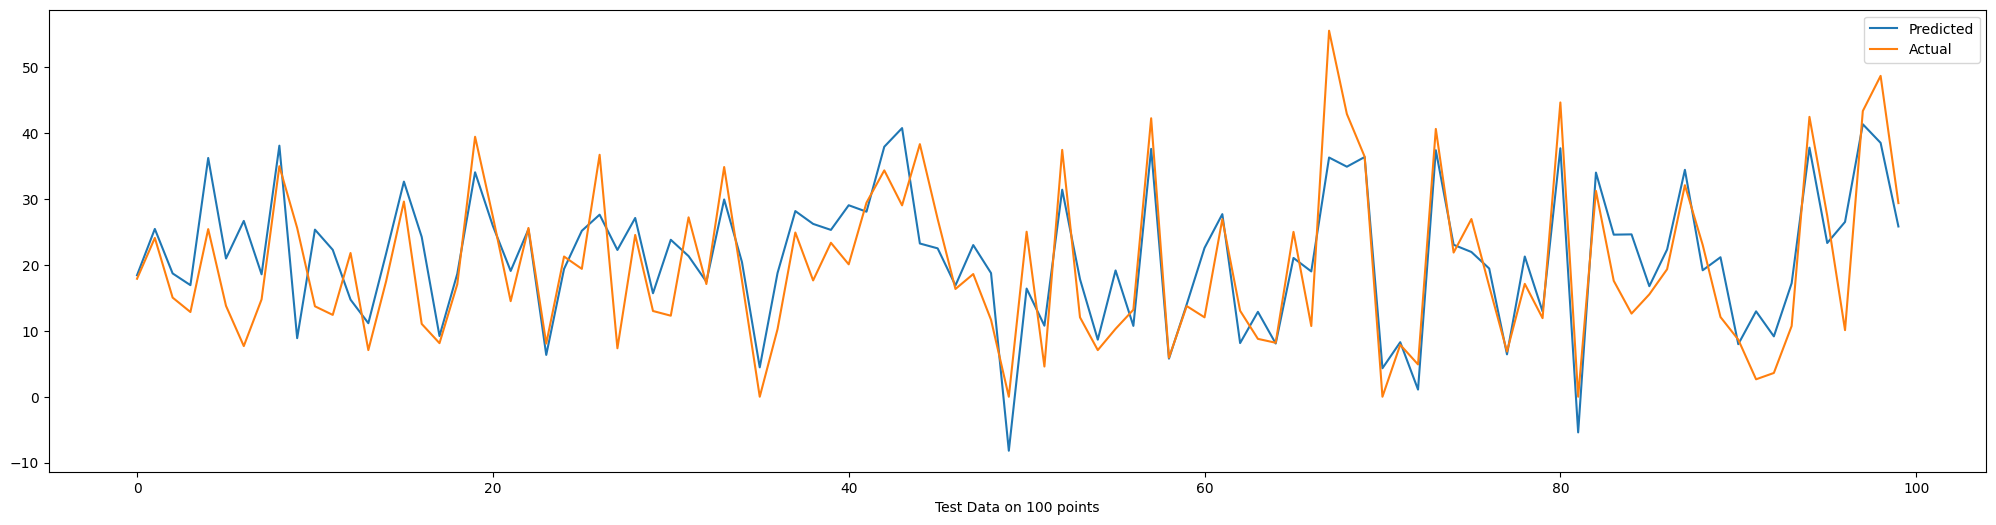

In [97]:
plt.figure(figsize=(25,6))
plt.plot(y_pred_test[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.xlabel('Test Data on 100 points')
plt.show()

####  Cross- Validation & Hyperparameter Tuning

In [98]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [99]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -53.9683123913563


In [100]:
y_pred_train = ridge_regressor.predict(X_train)
y_pred_test = ridge_regressor.predict(X_test)

In [101]:
# Train
MSE = mean_absolute_error(y_train,y_pred_train)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_train,y_pred_train)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  5.621910038645731
RMSE:  2.3710567345902396
R2:  0.651909571459766


Looks like our train set's R2 score value is 0.65  which is reasonably good & that means our model is able to capture most of the data variance.

In [102]:
# Test
MSE = mean_absolute_error(y_test,y_pred_test)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred_test)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  5.733905087437194
RMSE:  2.394557388628887
R2:  0.6515326458339246


The test set's R2 score is 0.65 which is as same as train set's R2.This means our linear model is performing well on the data.

Text(0, 0.5, 'Actual')

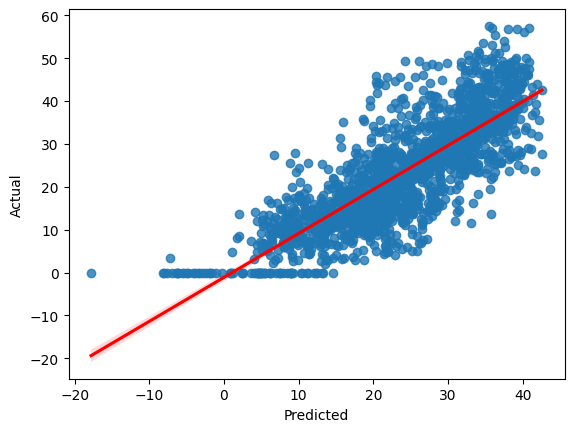

In [103]:
sns.regplot(x=y_pred_test, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

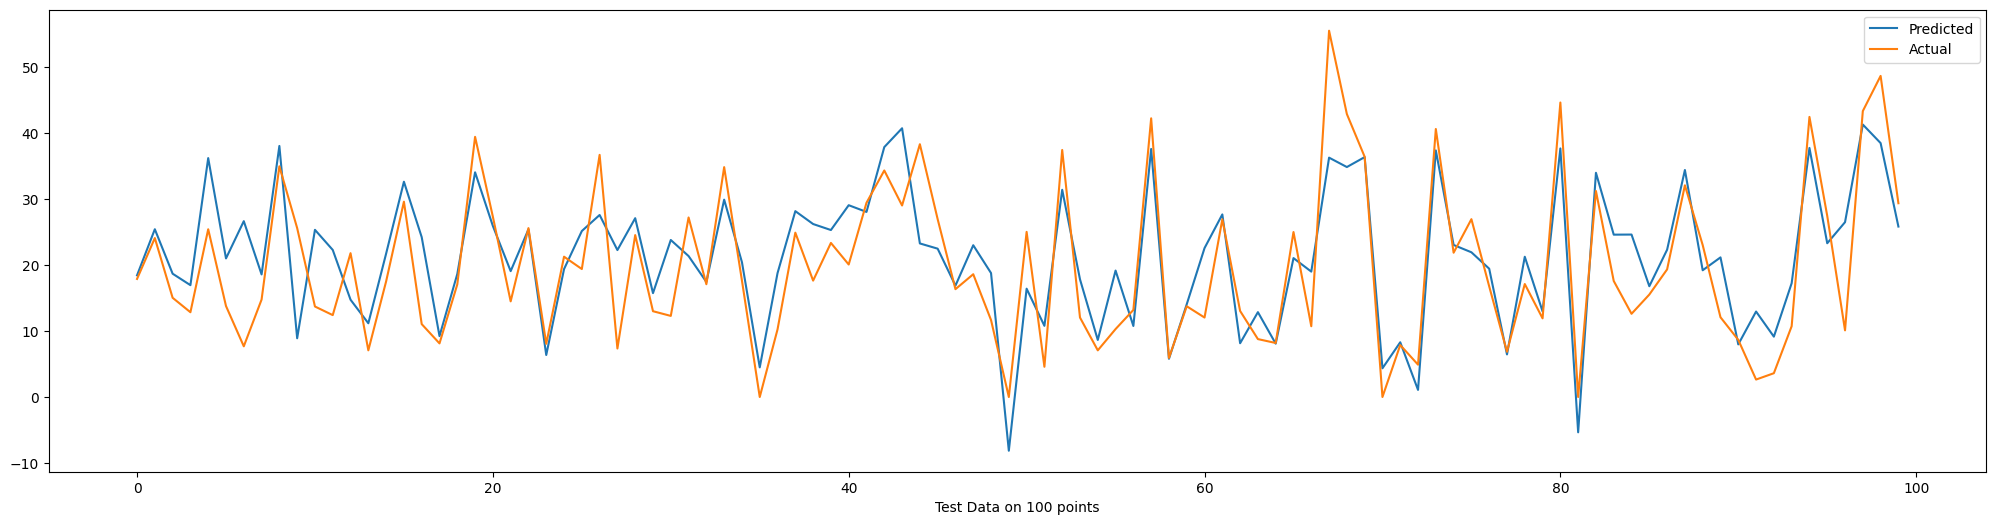

In [104]:
plt.figure(figsize=(25,6))
plt.plot(y_pred_test[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.xlabel('Test Data on 100 points')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter tuning because it helps in finding the optimal parameter values from a given set of parameters in a grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

R2 scores for Train & Test set :

Before Hyperparameter Tuning :

**Train set R2 score : 0.65**

**Test set R2 score : 0.65**

After Hyperparameter Tuning :

**Train set R2 score : 0.65**

**Test set R2 score : 0.65**

It is observed that R2 scores for Train & Test set has been similar  after hyperparameter tuning.

Which indiacates there isn't much difference in the results obtained from Linear Regression , Lasso Regression & Ridge Regression.



# **Random Forest Regressor with GridSearchCV**

In [105]:
rf_model = RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


In [106]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'max_leaf_nodes': [40, 60, 80],
                         'n_estimators': [60, 80, 100]})

In [107]:
y_pred_train = rf_grid.predict(X_train)
y_pred_test = rf_grid.predict(X_test)

In [108]:
# Train
MSE = mean_absolute_error(y_train,y_pred_train)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_train,y_pred_train)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  2.867140070828156
RMSE:  1.6932631428186689
R2:  0.9017191309510479


Looks like our train set's R2 score value is 0.90  which is reasonably good & that means our model is able to capture most of the data variance.

In [109]:
# Test
MSE = mean_absolute_error(y_test,y_pred_test)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred_test)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2: ",R2)

MSE:  3.136652112220646
RMSE:  1.7710596015438458
R2:  0.8769059368139335


The test set's R2 score is 0.87 .This means our linear model is performing well on the data.

Text(0, 0.5, 'Actual')

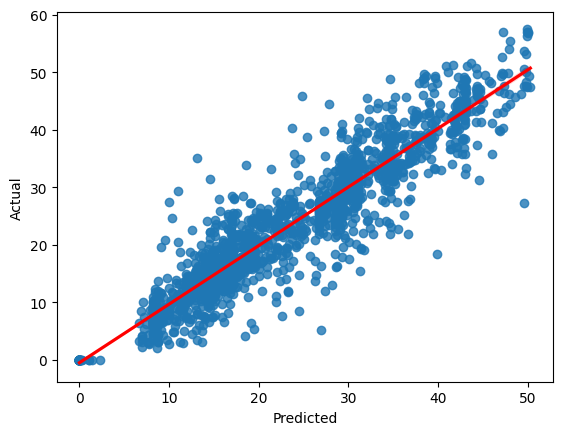

In [110]:
sns.regplot(x=y_pred_test, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

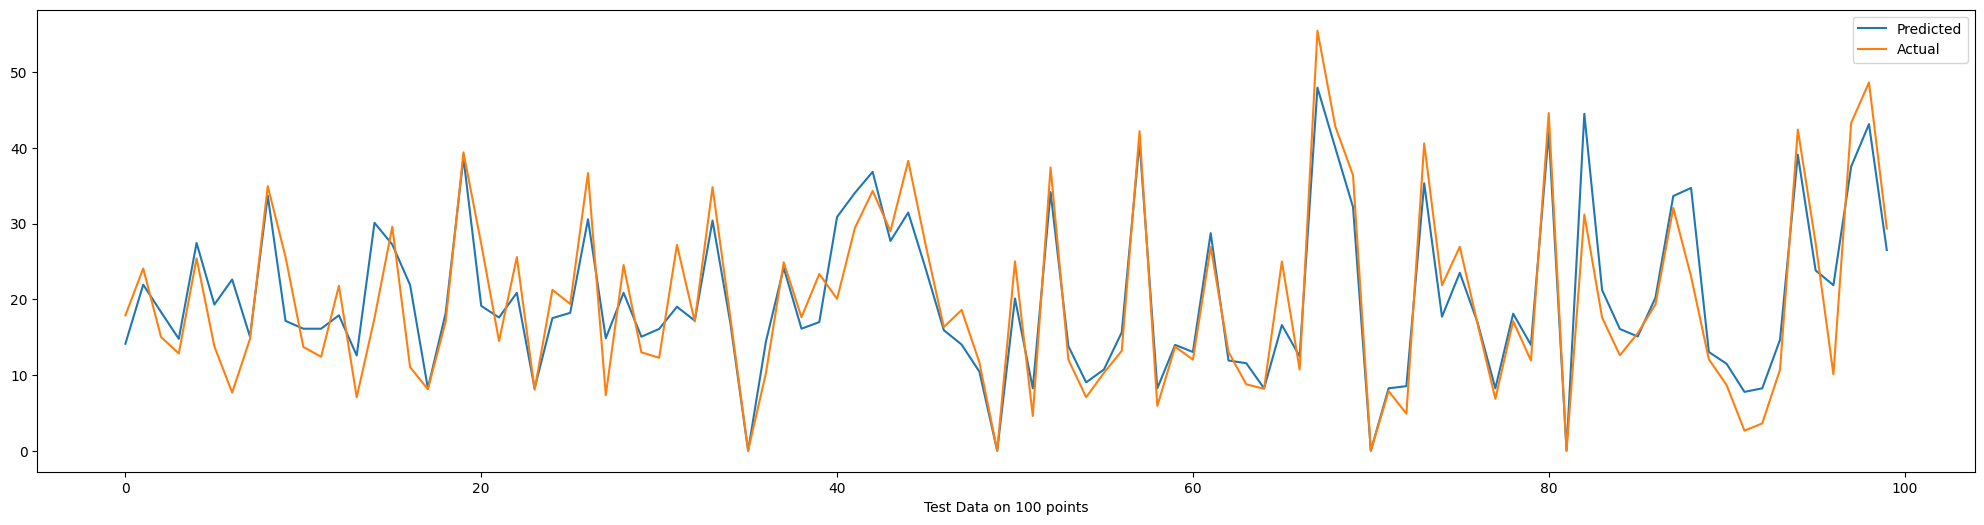

In [112]:
plt.figure(figsize=(25,6))
plt.plot(y_pred_test[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.xlabel('Test Data on 100 points')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R2 score is used for evaluating as R2 (R-squared )is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As Linear,Lasso and Ridge Regression Models gave very similar resuls for Test & Train sets we implemented RandomForest Regressor (with GridsearchCV) with gave us a reasonably good scores i.e

Train set R2 score : 0.90

Test set R2 score : 0.87



# **Conclusion**

- **EDA**

 -There are no Duplicate or Null values in our dataset

 -It is observed among 4 distinct seasons most number of bikes are rented in Summer while the least number of bikes are rented in Autumn.

 -It is observed that there is an increase in the rented bike counts from 3 rd to 6 th month.

 -It is oberved that around 96.5% bikes are rented on a No Holiday whereas remaining only 3.5% bikes are rented on a Holiday & also that 100% bikes are rented on functioning days.

 -It is observed that most bikes are rented when there is negligible snowfall and rainfall.

 -It is observed that the demand of rented bike is uniformly distribute despite of wind speed.

 -It is observed that over a moderate range of Dew point temperatures as well as for Temperature the demands for bikes has increased.

 -It is observed that most of the variables are positively correlated with target variable(Rented Bike Count) like Temperature,Dew point temperature.
Few are negatively correlated with target variable like humidity,rainfall.

 -New columns were added such as Winter,Summer,Autumn,Summer,Month and some were dropped namely Date,Dew point temperature.

- **ML Model**

 -As Linear,Lasso and Ridge Regression Models gave very similar resuls for Test & Train sets

  Train set R2 score : 0.65

  Test set R2 score : 0.65

  We implemented RandomForest Regressor (with GridsearchCV) with gave us a reasonably good scores i.e

  Train set R2 score : 0.90

  Test set R2 score : 0.87


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***